# EDA-Invistico Airlines

# Capstone Project Group -2

###### Loading essential libraries

In [1]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# resample the dataset
from sklearn.utils import resample
from sklearn.utils import shuffle

# import various functions from sklearn 
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.naive_bayes import GaussianNB

# import the XGBoost function for classification
from xgboost import XGBClassifier
import lightgbm as lgb

import random

#stats libraries
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy import stats
import statistics

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [2]:
df=pd.read_csv("Invistico_Airline.csv")
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


Note : In the dataset we see "Type of Customer" being referred as Loyal and disloyal ,for the sake of airline
industry we will refer as Frequent,Non-Frequent Travellors.

In [3]:
df["Customer Type"].replace("Loyal Customer","Frequent",inplace=True)

In [4]:
df["Customer Type"].replace("disloyal Customer","NonFrequent",inplace=True)

In [5]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Frequent,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Frequent,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Frequent,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Frequent,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Frequent,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [6]:
df['Customer Type'].value_counts()

Frequent       106100
NonFrequent     23780
Name: Customer Type, dtype: int64

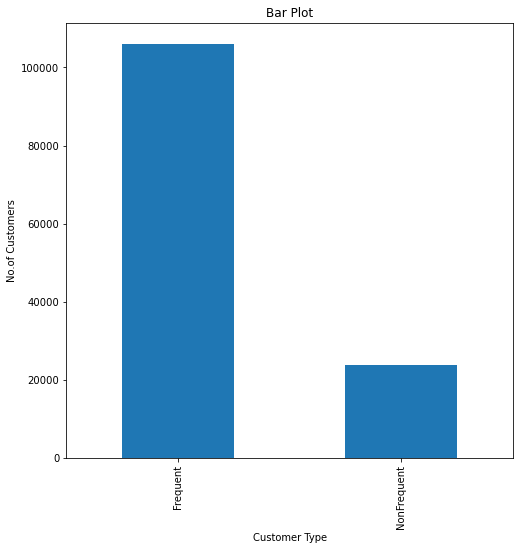

In [7]:
plt.figure(figsize=(8,8))
df['Customer Type'].value_counts().plot(kind="bar")
plt.ylabel("No.of Customers")
plt.xlabel("Customer Type")
plt.title("Bar Plot")
plt.show()

# Analyzing the dataset

In [8]:
df.shape

(129880, 23)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [10]:
df.describe(include="all")

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880,129880,129880,129880.000000,129880,129880,129880.000000,129880.000000,129880.000000,129880.000000,...,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
unique,2,2,2,NaN,2,3,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,satisfied,Female,Frequent,NaN,Business travel,Business,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,71087,65899,106100,NaN,89693,62160,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,39.427957,NaN,NaN,1981.409055,2.838597,2.990645,2.851994,...,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,NaN,NaN,NaN,15.119360,NaN,NaN,1027.115606,1.392983,1.527224,1.443729,...,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,NaN,NaN,NaN,7.000000,NaN,NaN,50.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,27.000000,NaN,NaN,1359.000000,2.000000,2.000000,2.000000,...,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,NaN,NaN,NaN,40.000000,NaN,NaN,1925.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,NaN,NaN,NaN,51.000000,NaN,NaN,2544.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000


# Null Value analysis

In [11]:
df.isna().sum() # count of null values

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

In [12]:
(df.isna().sum())/len(df) # percentage of null values

satisfaction                         0.000000
Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Seat comfort                         0.000000
Departure/Arrival time convenient    0.000000
Food and drink                       0.000000
Gate location                        0.000000
Inflight wifi service                0.000000
Inflight entertainment               0.000000
Online support                       0.000000
Ease of Online booking               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Cleanliness                          0.000000
Online boarding                      0.000000
Departure Delay in Minutes        

# Numeric columns

In [13]:
num=df.select_dtypes(np.number)
num.columns.tolist()

['Age',
 'Flight Distance',
 'Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

# Categorical Columns

In [14]:
cat=df.select_dtypes(object)
cat.columns.tolist()

['satisfaction', 'Gender', 'Customer Type', 'Type of Travel', 'Class']

# Analyzing Correlation

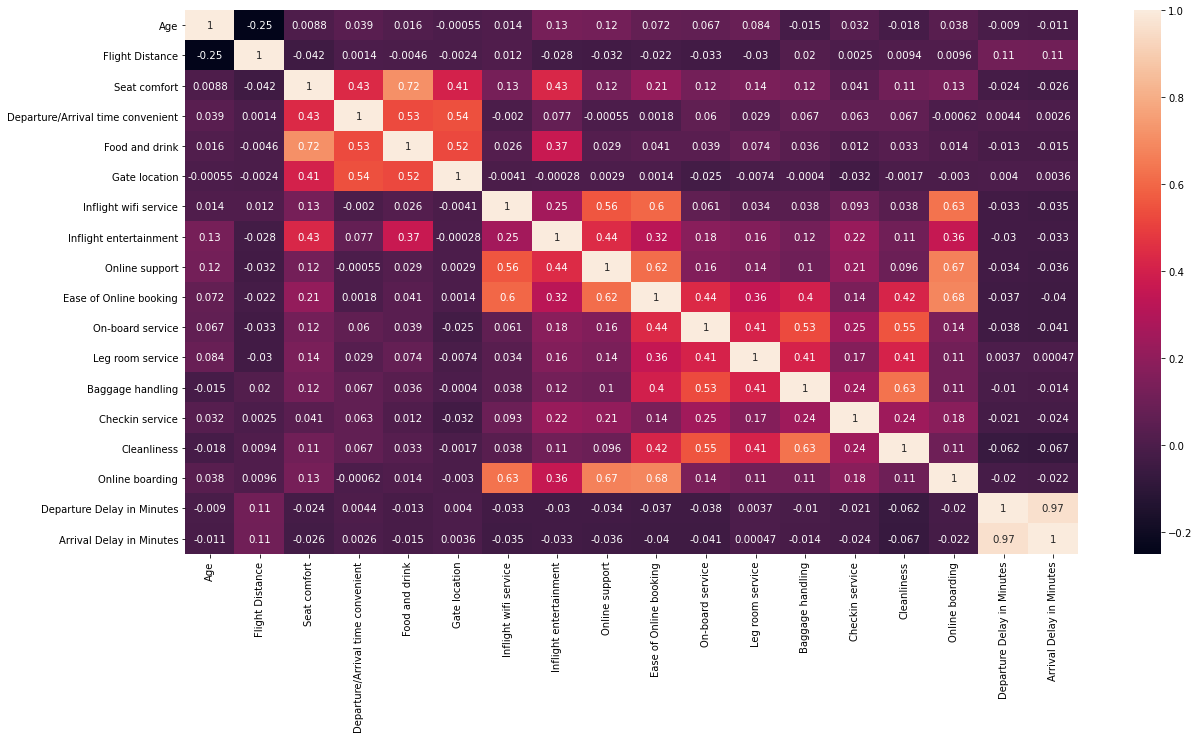

In [15]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10.2})
plt.show()

#### Inferences

# Null value Imputations

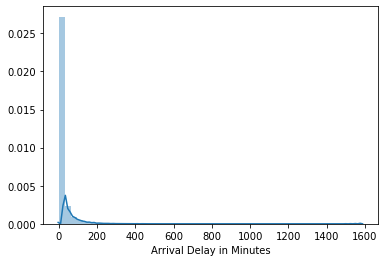

In [16]:
sns.distplot(df["Arrival Delay in Minutes"])
plt.show()

In [17]:
print("Skewness is:",df["Arrival Delay in Minutes"].skew())

Skewness is: 6.670124610533307


Note : As the data is rightly skewed we impute with median value

In [18]:
df["Arrival Delay in Minutes"]=df["Arrival Delay in Minutes"].fillna(df["Arrival Delay in Minutes"].median())

In [19]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Frequent,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Frequent,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Frequent,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Frequent,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Frequent,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


# Checking  for null values after imputation

In [20]:
df.isna().sum()/len(df)*100

satisfaction                         0.0
Gender                               0.0
Customer Type                        0.0
Age                                  0.0
Type of Travel                       0.0
Class                                0.0
Flight Distance                      0.0
Seat comfort                         0.0
Departure/Arrival time convenient    0.0
Food and drink                       0.0
Gate location                        0.0
Inflight wifi service                0.0
Inflight entertainment               0.0
Online support                       0.0
Ease of Online booking               0.0
On-board service                     0.0
Leg room service                     0.0
Baggage handling                     0.0
Checkin service                      0.0
Cleanliness                          0.0
Online boarding                      0.0
Departure Delay in Minutes           0.0
Arrival Delay in Minutes             0.0
dtype: float64

In [21]:
df_1=df[df['Age']>12]
df_1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Frequent,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Frequent,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Frequent,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Frequent,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Frequent,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [22]:
df_1.shape

(125086, 23)

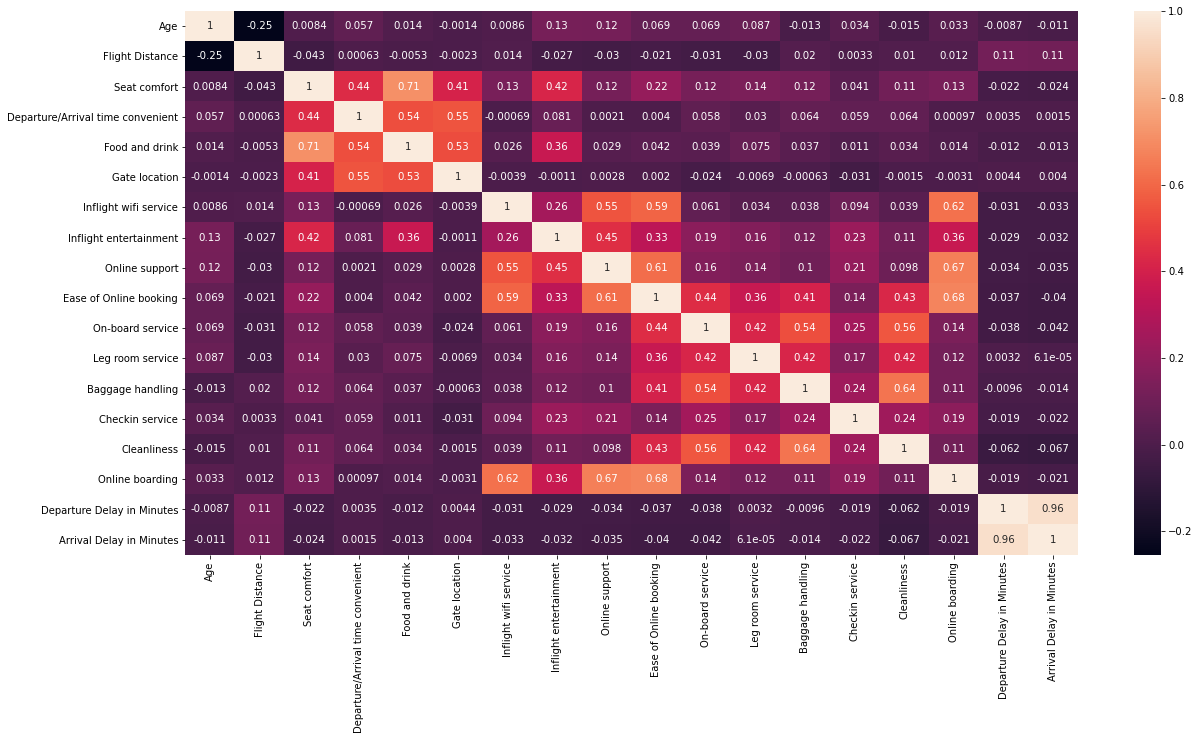

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df_1.corr(),annot=True,annot_kws={'size':10.2})
plt.show()

# Visualizing Categorial Features(Uni-Variate)

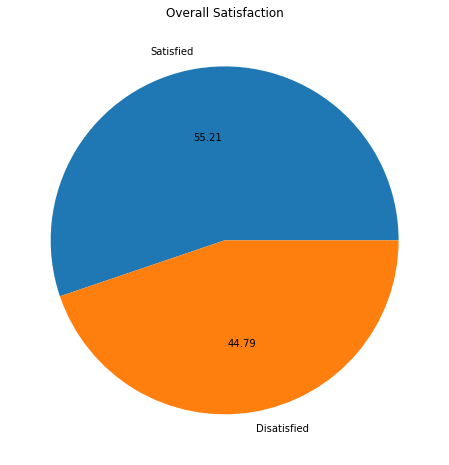

In [24]:
plt.figure(figsize=(15,8))
plt.pie(x=df_1["satisfaction"].value_counts(),labels=["Satisfied","Disatisfied"],autopct="%0.2f")
plt.title("Overall Satisfaction")
plt.show()

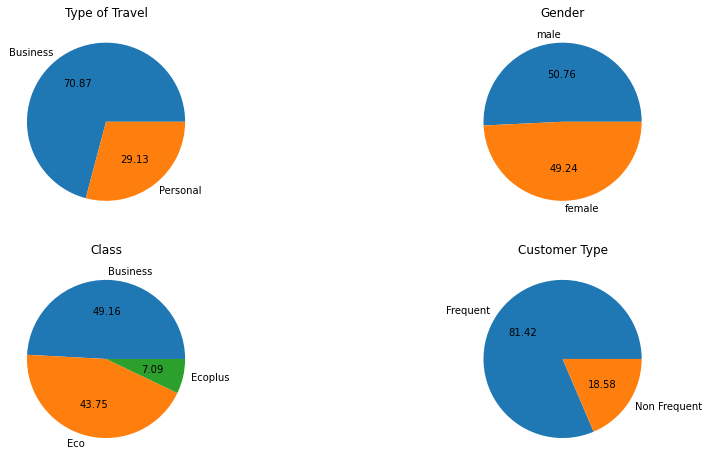

In [25]:
plt.figure(figsize=(15,8))
plt.subplot(2, 2, 1)
plt.pie(x=df_1["Type of Travel"].value_counts(),labels=["Business","Personal"],autopct="%0.2f")
plt.title("Type of Travel")


plt.subplot(2, 2, 2)
plt.pie(x=df_1["Gender"].value_counts(),labels=["male","female"],autopct="%0.2f")
plt.title("Gender")

plt.subplot(2, 2, 3)
plt.pie(x=df_1["Class"].value_counts(),labels=["Business","Eco","Ecoplus"],autopct="%0.2f")
plt.title("Class")


plt.subplot(2, 2, 4)
plt.pie(x=df_1["Customer Type"].value_counts(),labels=["Frequent","Non Frequent"],autopct="%0.2f")
plt.title("Customer Type")


plt.show()


#### Inferences

#  Visualizing Categorical Features with Target Feature(Bi-Variate)

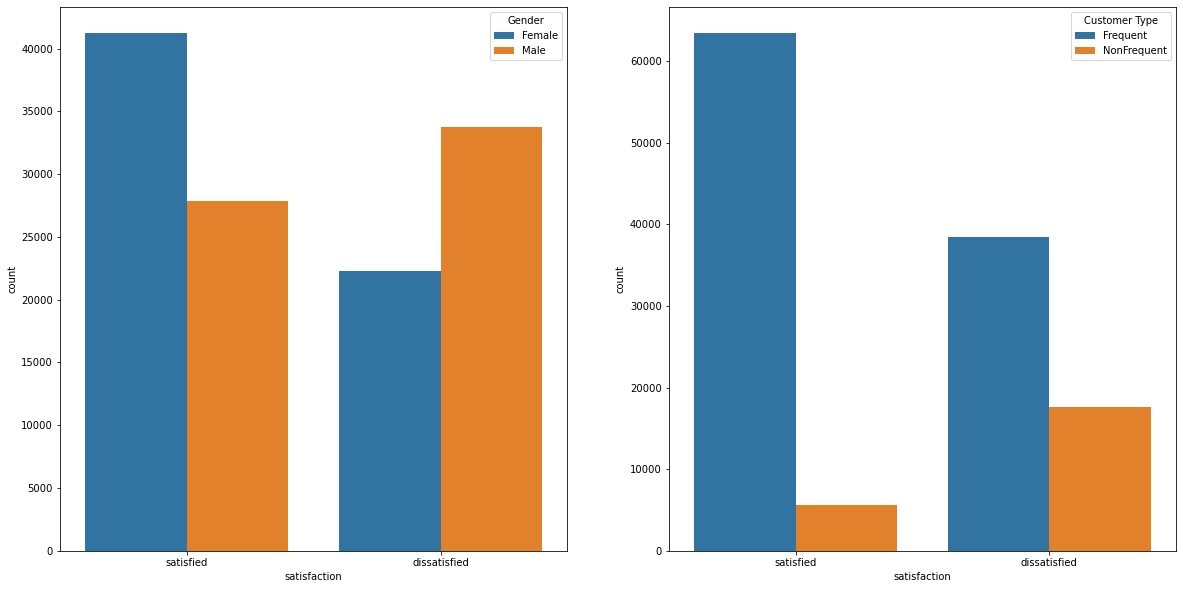

In [26]:
plt.fig,axes=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df_1["satisfaction"],hue=df_1["Gender"],ax=axes[0])
sns.countplot(x=df_1["satisfaction"],hue=df_1["Customer Type"],ax=axes[1])
plt.show()

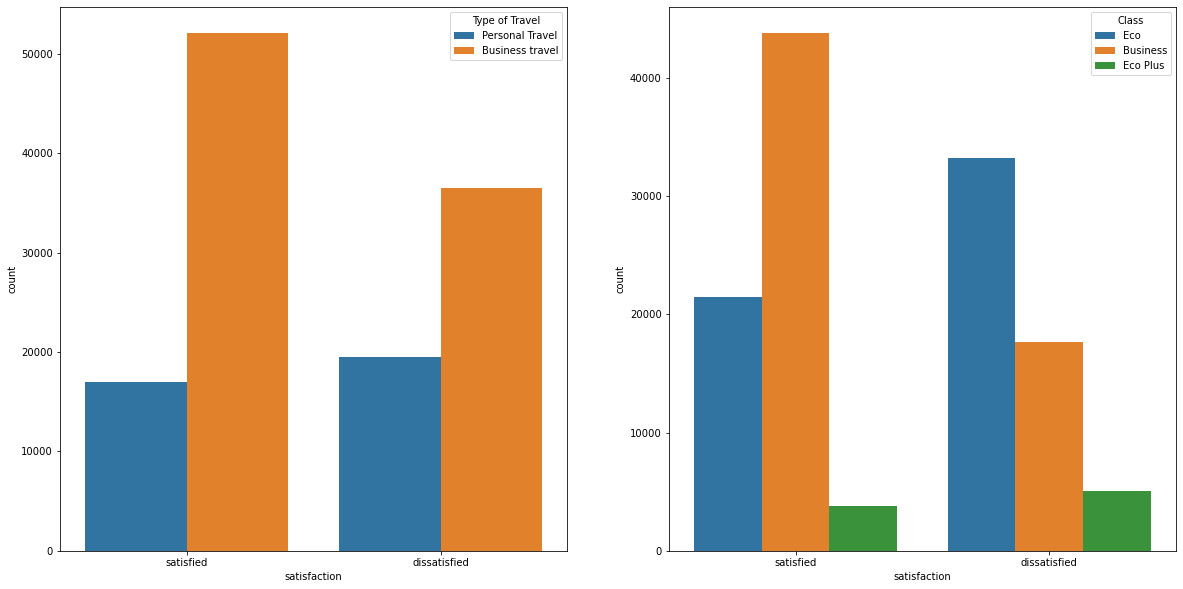

In [27]:
plt.fig,axes=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df_1["satisfaction"],hue=df_1["Type of Travel"],ax=axes[0])
sns.countplot(x=df_1["satisfaction"],hue=df_1["Class"],ax=axes[1])
plt.show()

# Infering the Count observations (categorial and target)

In [28]:
print("COUNT OF CATEGORICAL FEATURES WITH TARGET")
print()

clas=pd.crosstab(df_1["satisfaction"],df_1["Class"])
print(clas)
print()
gen=pd.crosstab(df_1["satisfaction"],df_1["Gender"])
print(gen)
print()
cust=pd.crosstab(df_1["satisfaction"],df_1["Customer Type"])
print(cust)
print()
tt=pd.crosstab(df_1["satisfaction"],df_1["Type of Travel"])
print(tt)
print()


COUNT OF CATEGORICAL FEATURES WITH TARGET

Class         Business    Eco  Eco Plus
satisfaction                           
dissatisfied     17686  33246      5093
satisfied        43807  21481      3773

Gender        Female   Male
satisfaction               
dissatisfied   22259  33766
satisfied      41230  27831

Customer Type  Frequent  NonFrequent
satisfaction                        
dissatisfied      38399        17626
satisfied         63449         5612

Type of Travel  Business travel  Personal Travel
satisfaction                                    
dissatisfied              36545            19480
satisfied                 52104            16957



# Infering the Percentage observations (categorial and target)

In [29]:
print("PERCENTAGES OF COUNT OF CATEGORICAL FEATURES WITH TARGET")
print()

print(clas/len(df_1)*100)
print()
print(gen/len(df_1)*100)
print()
print(cust/len(df_1)*100)
print()
print(tt/len(df_1)*100)



PERCENTAGES OF COUNT OF CATEGORICAL FEATURES WITH TARGET

Class          Business        Eco  Eco Plus
satisfaction                                
dissatisfied  14.139072  26.578514  4.071599
satisfied     35.021505  17.172985  3.016325

Gender           Female       Male
satisfaction                      
dissatisfied  17.794957  26.994228
satisfied     32.961323  22.249492

Customer Type   Frequent  NonFrequent
satisfaction                         
dissatisfied   30.698080    14.091105
satisfied      50.724302     4.486513

Type of Travel  Business travel  Personal Travel
satisfaction                                    
dissatisfied          29.215899        15.573286
satisfied             41.654542        13.556273


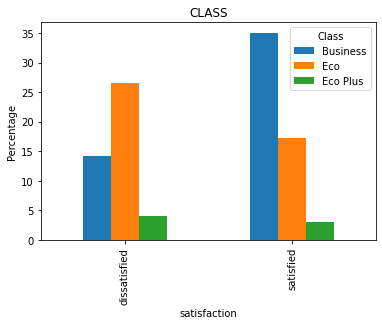

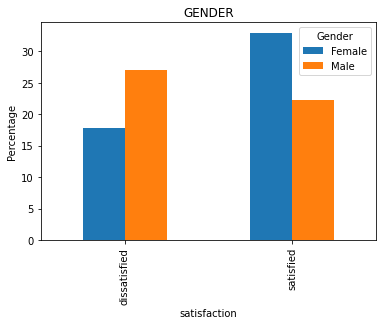

In [30]:
(clas/len(df_1)*100).plot(kind="bar")
plt.xlabel("satisfaction")
plt.ylabel("Percentage")
plt.title("CLASS")
plt.show()

(gen/len(df_1)*100).plot(kind="bar")
plt.xlabel("satisfaction")
plt.ylabel("Percentage")
plt.title("GENDER")
plt.show()


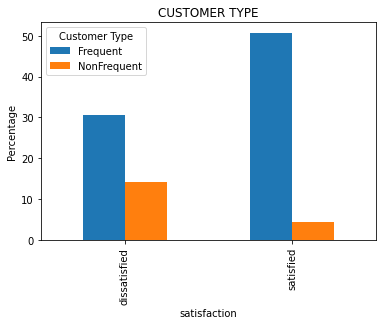

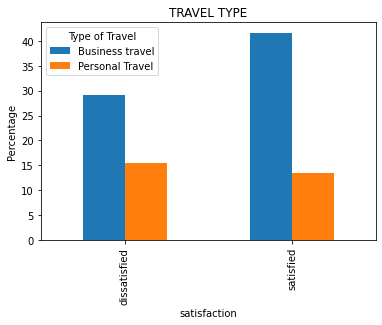

In [31]:
(cust/len(df_1)*100).plot(kind="bar")
plt.xlabel("satisfaction")
plt.ylabel("Percentage")
plt.title("CUSTOMER TYPE")
plt.show()

(tt/len(df_1)*100).plot(kind="bar")
plt.xlabel("satisfaction")
plt.ylabel("Percentage")
plt.title("TRAVEL TYPE")
plt.show()


#### Inferences

# Categorical With Categorical(Multi-Variate)

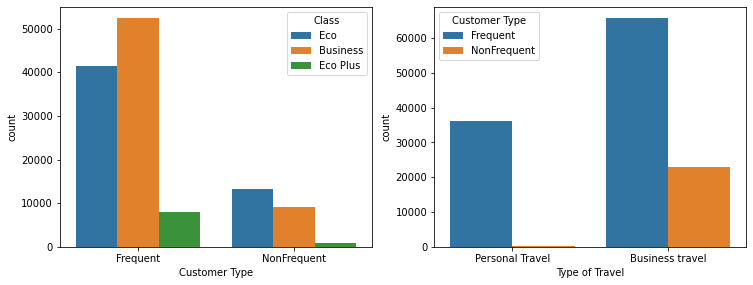

In [32]:
plt.figure(figsize=(19,15))
plt.subplot(3,3,1)
sns.countplot(df_1["Customer Type"],hue=df_1["Class"])

plt.subplot(3,3,2)
sns.countplot(df_1["Type of Travel"],hue=df_1["Customer Type"])
plt.show()

#### Inferences

# Analyzing Services

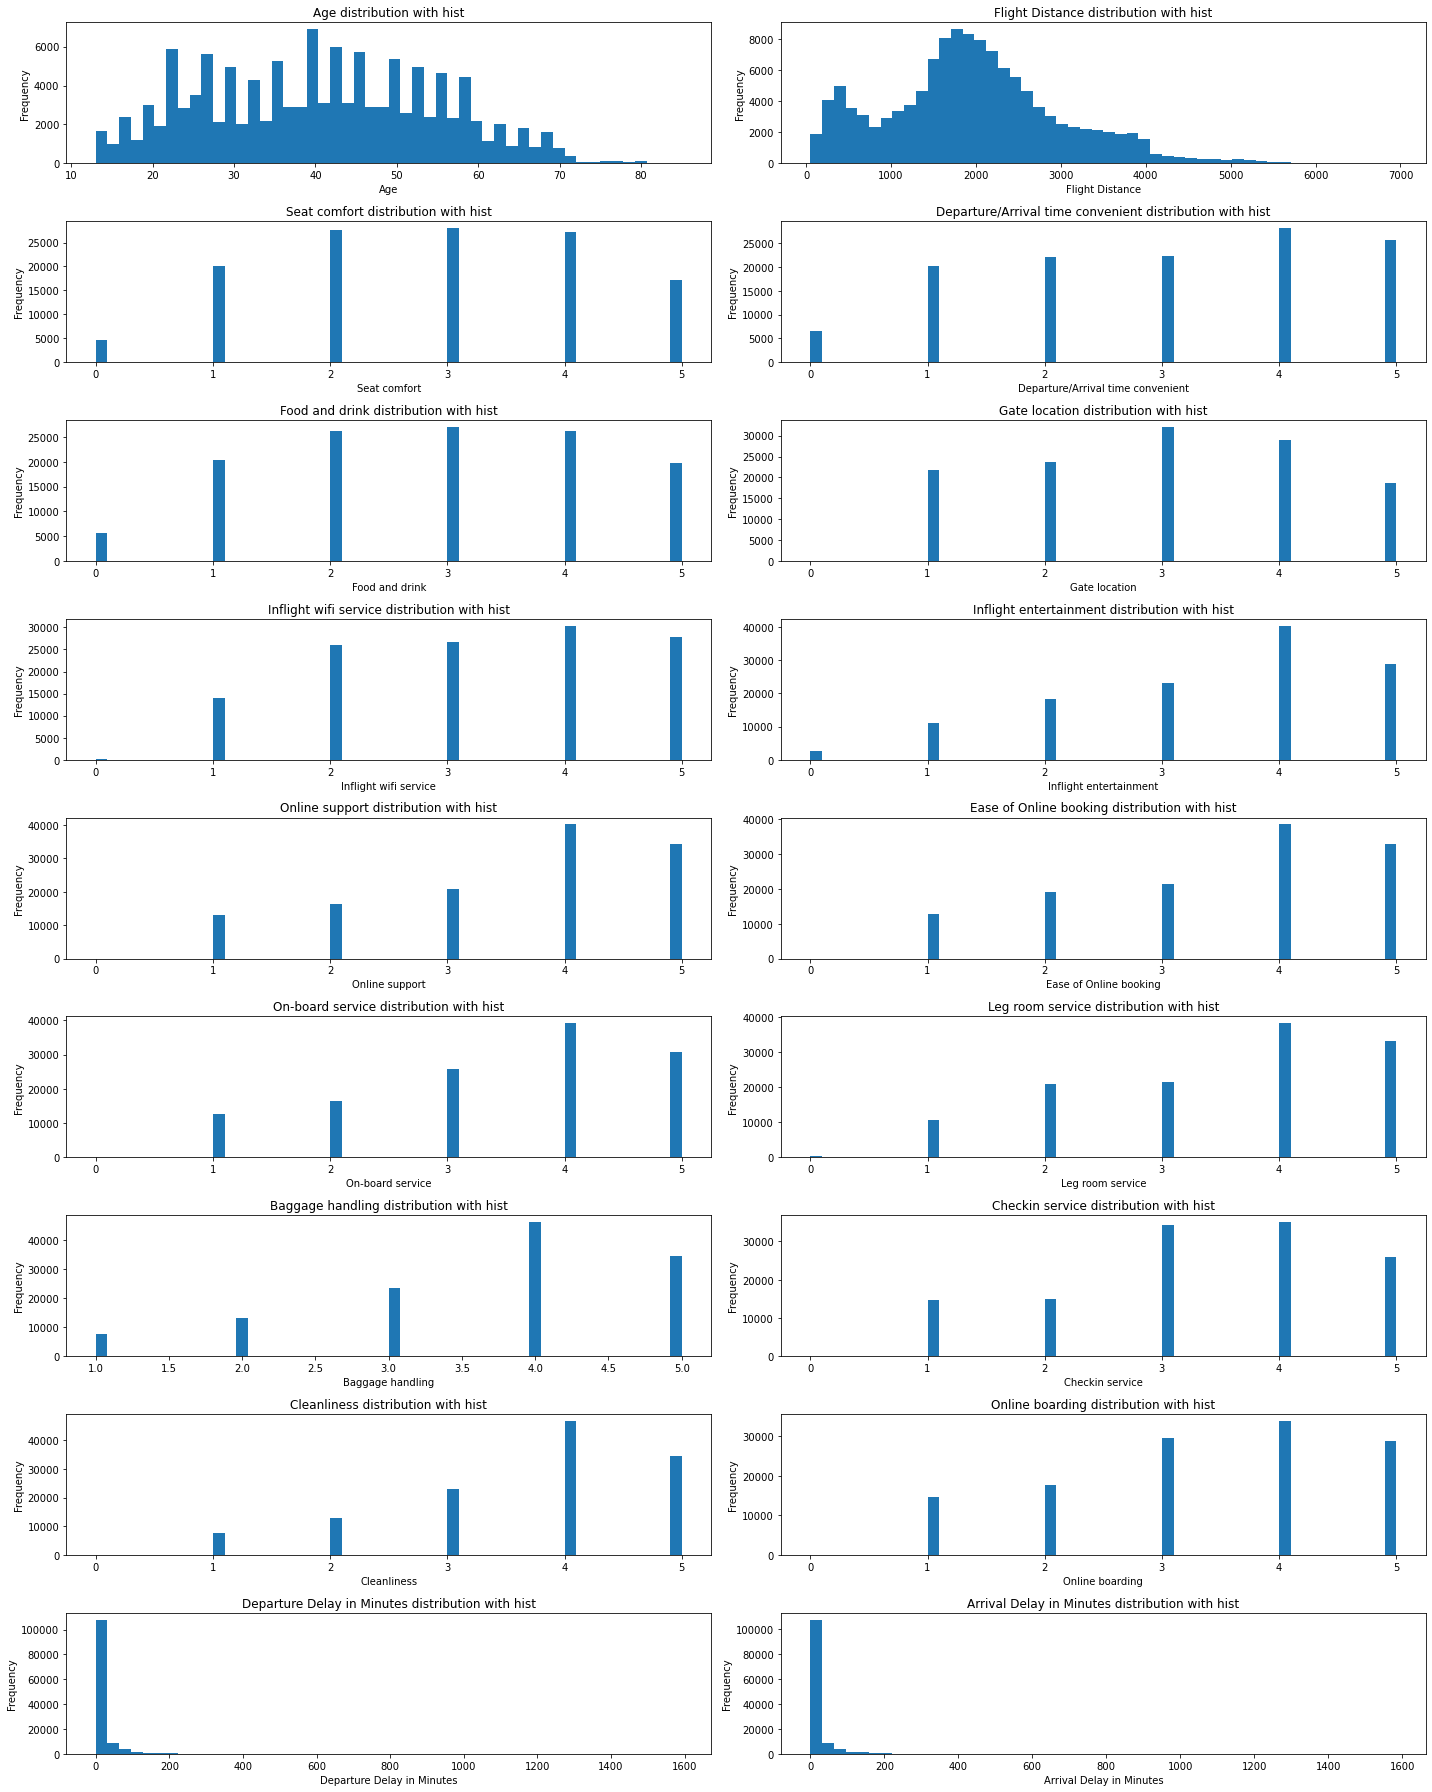

In [33]:
services = ["Age", "Flight Distance", "Seat comfort", 
              "Departure/Arrival time convenient", "Food and drink", 
              "Gate location", "Inflight wifi service", "Inflight entertainment", "Online support", 
              "Ease of Online booking", "On-board service", "Leg room service", "Baggage handling", 
              "Checkin service", "Cleanliness", "Online boarding", "Departure Delay in Minutes", "Arrival Delay in Minutes"]

fig, axs = plt.subplots(nrows=9, ncols=2,figsize=(20,25))

row = 0
col = 0
for n in services:
    if(col==2):
        row+=1
        col=0
    axs[row,col].hist(df_1[n], bins = 50)
    axs[row,col].set_xlabel(n)
    axs[row,col].set_ylabel('Frequency')
    axs[row,col].set_title("{} distribution with hist".format(n))
    
    col+=1
    
fig.tight_layout()
plt.show()

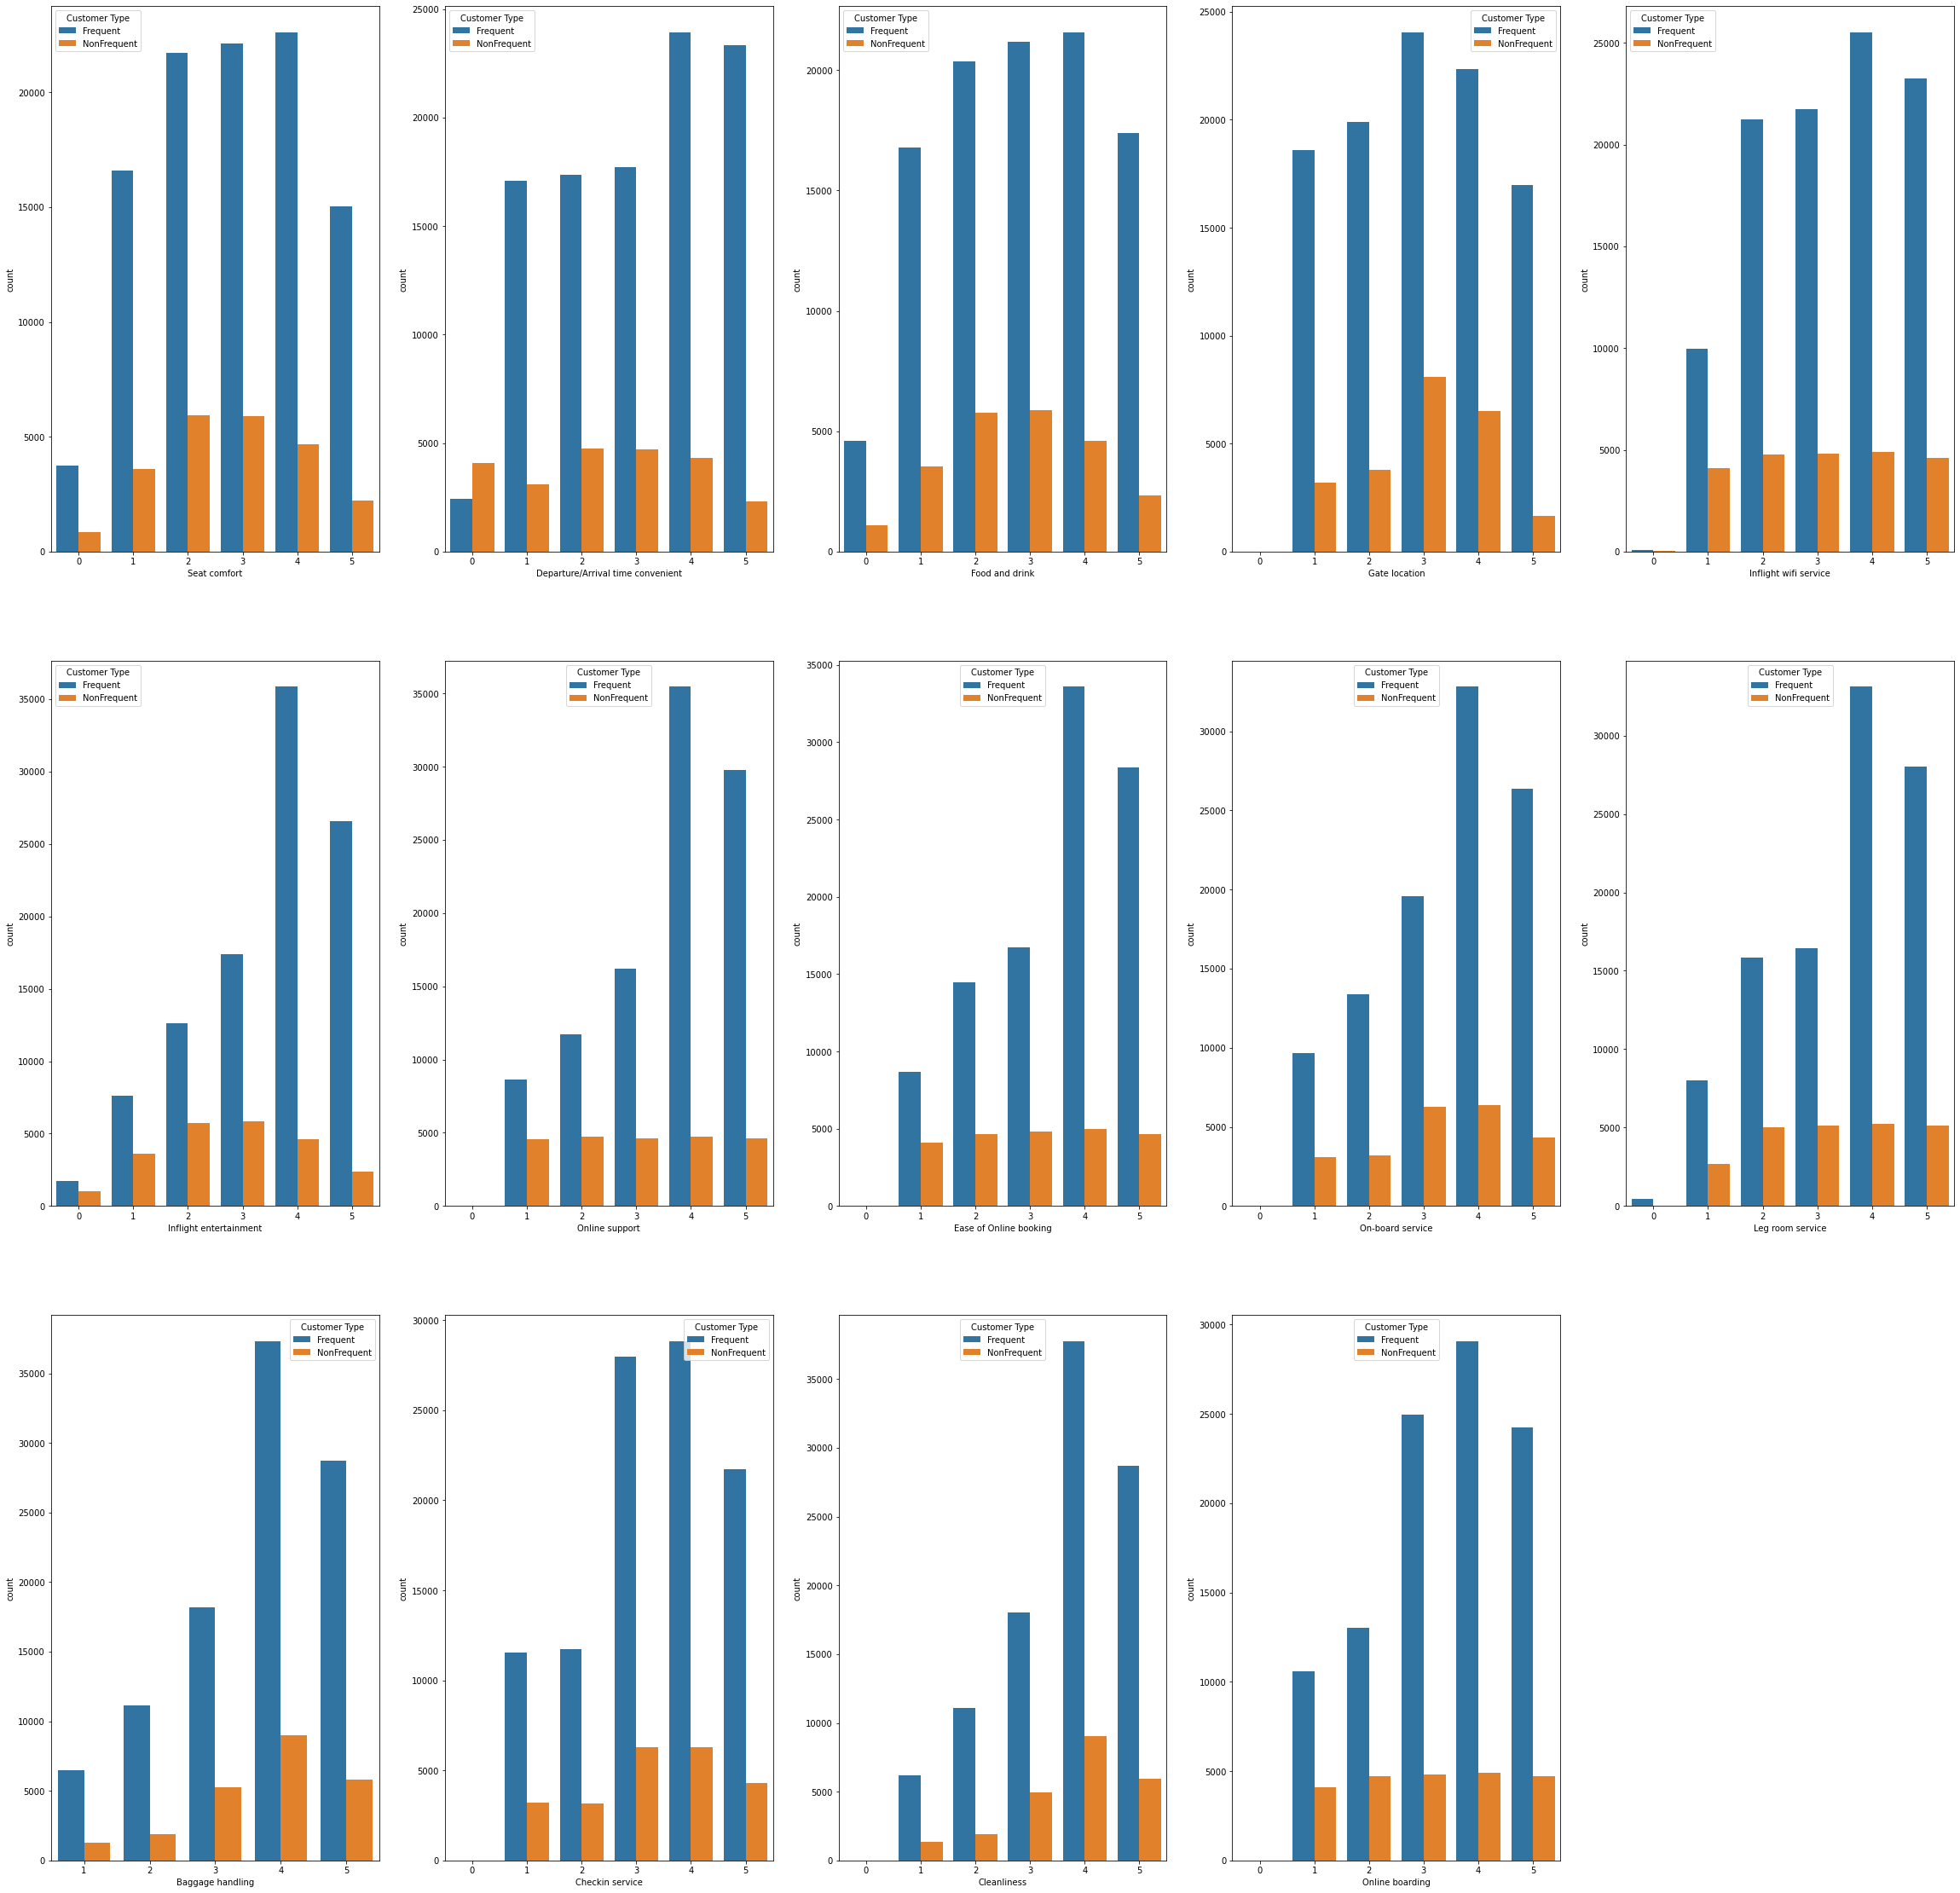

In [34]:
plt.figure(figsize=(40,40))
plt.subplot(3,5,1)
sns.countplot(df_1["Seat comfort"],hue=df_1["Customer Type"])
plt.subplot(3,5,2)
sns.countplot(df_1["Departure/Arrival time convenient"],hue=df_1["Customer Type"])
plt.subplot(3,5,3)
sns.countplot(df_1["Food and drink"],hue=df_1["Customer Type"])
plt.subplot(3,5,4)
sns.countplot(df_1["Gate location"],hue=df_1["Customer Type"])
plt.subplot(3,5,5)
sns.countplot(df_1["Inflight wifi service"],hue=df_1["Customer Type"])
plt.subplot(3,5,6)
sns.countplot(df_1["Inflight entertainment"],hue=df_1["Customer Type"])
plt.subplot(3,5,7)
sns.countplot(df_1["Online support"],hue=df_1["Customer Type"])
plt.subplot(3,5,8)
sns.countplot(df_1["Ease of Online booking"],hue=df_1["Customer Type"])
plt.subplot(3,5,9)
sns.countplot(df_1["On-board service"],hue=df_1["Customer Type"])
plt.subplot(3,5,10)
sns.countplot(df_1["Leg room service"],hue=df_1["Customer Type"])
plt.subplot(3,5,11)
sns.countplot(df_1["Baggage handling"],hue=df_1["Customer Type"])
plt.subplot(3,5,12)
sns.countplot(df_1["Checkin service"],hue=df_1["Customer Type"])
plt.subplot(3,5,13)
sns.countplot(df_1["Cleanliness"],hue=df_1["Customer Type"])
plt.subplot(3,5,14)
sns.countplot(df_1["Online boarding"],hue=df_1["Customer Type"])
plt.show()


In [35]:
dfservice=pd.DataFrame({"Frequent Customer-Rating(0-5)":[4,4,4,3,4,4,4,4,4,4,4,4,4,4],"Non-Frequent Customer-Rating(0-5)":[2,2,3,3,4,3,3,4,4,4,4,3,4,4],"Overall Customer Ratings(0-5)":[(3,4),4,3,3,4,4,4,4,4,4,4,4,4,4]},index=['Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding'])

In [36]:
dfservice

,Frequent Customer-Rating(0-5),Non-Frequent Customer-Rating(0-5),Overall Customer Ratings(0-5)
Seat comfort,4,2,"(3, 4)"
Departure/Arrival time convenient,4,2,4
Food and drink,4,3,3
Gate location,3,3,3
Inflight wifi service,4,4,4
Inflight entertainment,4,3,4
Online support,4,3,4
Ease of Online booking,4,4,4
On-board service,4,4,4
Leg room service,4,4,4


#### Inferences

# Visualizing Numeric Variables:

In [37]:
df_2=df_1.iloc[:,[3,6,21]]
df_2

,Age,Flight Distance,Departure Delay in Minutes
0,65,265,0
1,47,2464,310
2,15,2138,0
3,60,623,0
4,70,354,0
...,...,...,...
129875,29,1731,0
129876,63,2087,174
129877,69,2320,155
129878,66,2450,193


## 1) Using KDE Plot

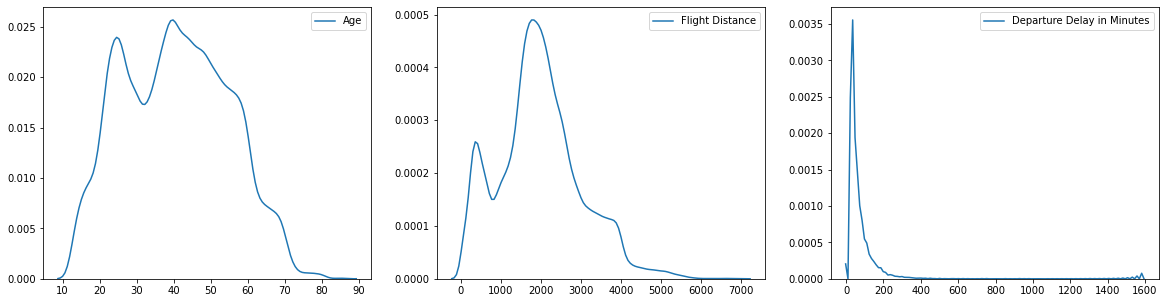

In [38]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.kdeplot(df_2['Age'])
plt.subplot(1,3,2)
sns.kdeplot(df_2['Flight Distance'])
plt.subplot(1,3,3)
sns.kdeplot(df_2['Departure Delay in Minutes'])
plt.savefig('kde')
plt.show()

#### 2) Inference aboubt Skewness with mean and median values

In [39]:
skew_mean_median=pd.DataFrame([df_2.skew(),df_2.mean(),df_2.median()],index=['skewness values','mean values','median values']).T
skew_mean_median

,skewness values,mean values,median values
Age,0.112703,40.572454,41.0
Flight Distance,0.466964,1972.144365,1916.0
Departure Delay in Minutes,6.736003,14.689757,0.0


#### Inferences

# Visualizing Numeric and Target Variable (Satisfaction)

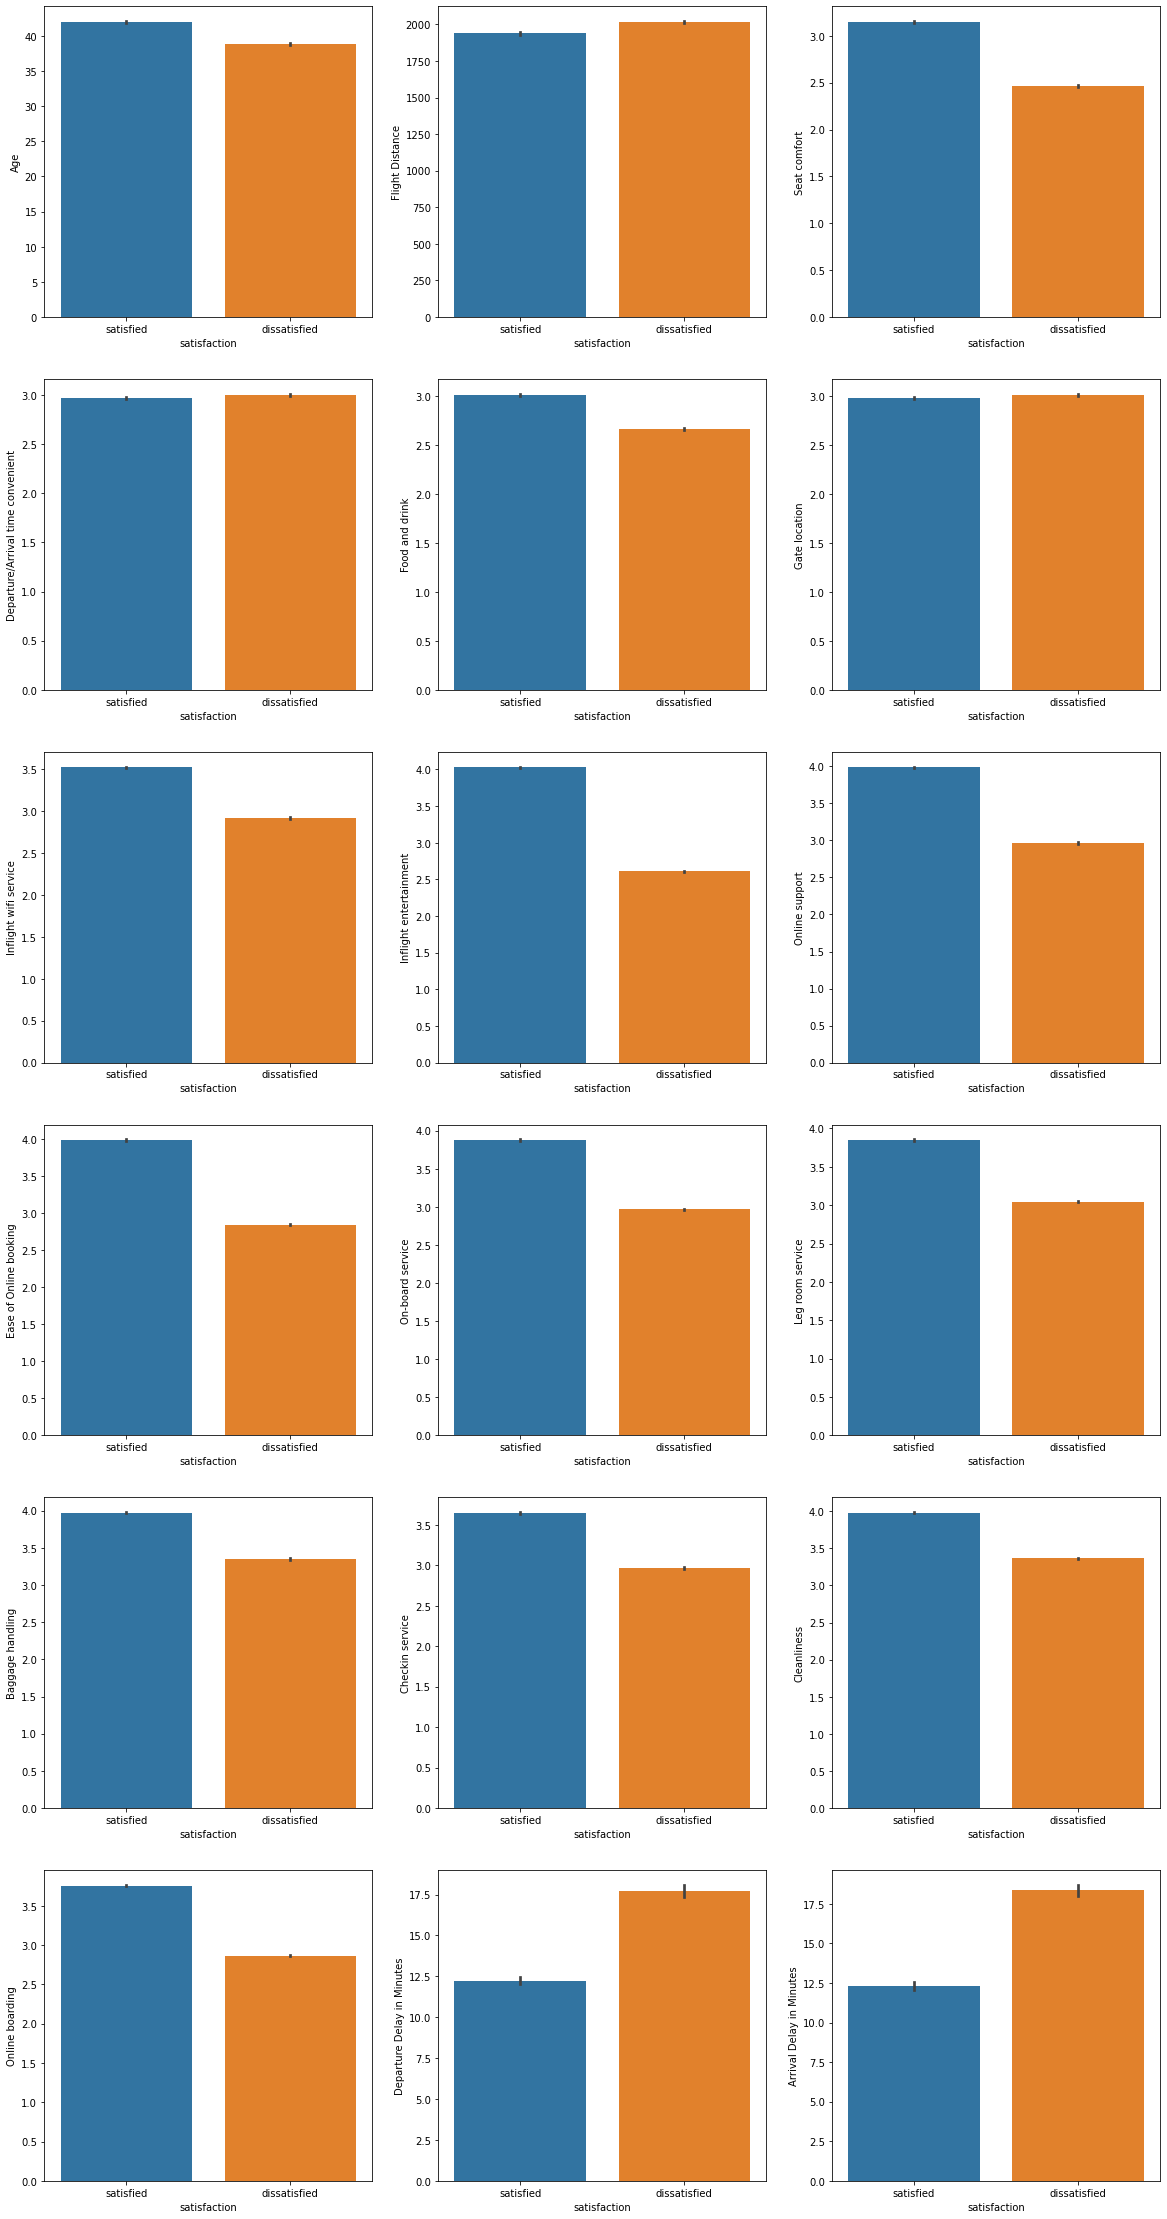

In [40]:
plt.figure(figsize=(20,40))
plt.subplot(6,3,1)
sns.barplot(df_1['satisfaction'],df_1['Age'])
plt.subplot(6,3,2)
sns.barplot(df_1['satisfaction'],df_1['Flight Distance'])
plt.subplot(6,3,3)
sns.barplot(df_1['satisfaction'],df_1['Seat comfort'])
plt.subplot(6,3,4)
sns.barplot(df_1['satisfaction'],df_1['Departure/Arrival time convenient'])
plt.subplot(6,3,5)
sns.barplot(df_1['satisfaction'],df_1['Food and drink'])
plt.subplot(6,3,6)
sns.barplot(df_1['satisfaction'],df_1['Gate location'])
plt.subplot(6,3,7)
sns.barplot(df_1['satisfaction'],df_1['Inflight wifi service'])
plt.subplot(6,3,8)
sns.barplot(df_1['satisfaction'],df_1['Inflight entertainment'])
plt.subplot(6,3,9)
sns.barplot(df_1['satisfaction'],df_1['Online support'])
plt.subplot(6,3,10)
sns.barplot(df_1['satisfaction'],df_1['Ease of Online booking'])
plt.subplot(6,3,11)
sns.barplot(df_1['satisfaction'],df_1['On-board service'])
plt.subplot(6,3,12)
sns.barplot(df_1['satisfaction'],df_1['Leg room service'])
plt.subplot(6,3,13)
sns.barplot(df_1['satisfaction'],df_1['Baggage handling'])
plt.subplot(6,3,14)
sns.barplot(df_1['satisfaction'],df_1['Checkin service'])
plt.subplot(6,3,15)
sns.barplot(df_1['satisfaction'],df_1['Cleanliness'])
plt.subplot(6,3,16)
sns.barplot(df_1['satisfaction'],df_1['Online boarding'])
plt.subplot(6,3,17)
sns.barplot(df_1['satisfaction'],df_1['Departure Delay in Minutes'])
plt.subplot(6,3,18)
sns.barplot(df_1['satisfaction'],df_1['Arrival Delay in Minutes'])
plt.show()


#### Inferences

## Dropping the Columns

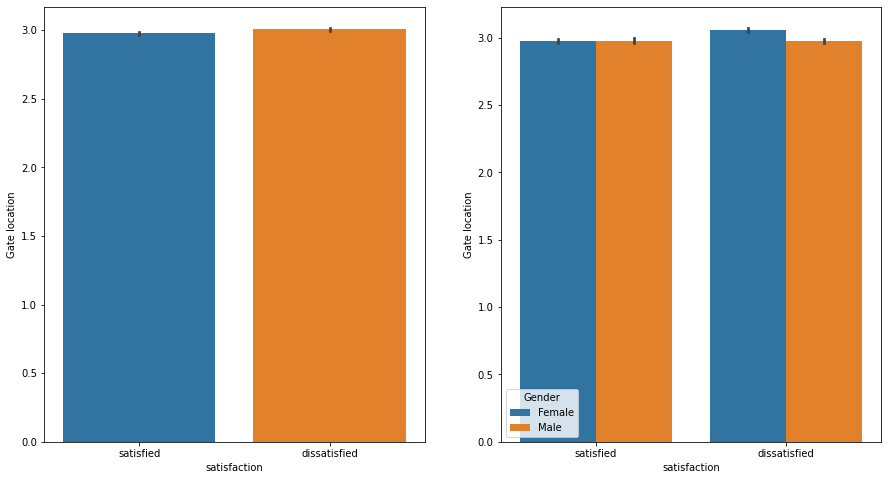

In [41]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(df_1['satisfaction'],df_1['Gate location'])
plt.subplot(1,2,2)
sns.barplot(df_1['satisfaction'],df_1["Gate location"],hue=df_1['Gender'])
plt.show()

#### Inferences

In [42]:
df_1=df_1.drop(['Gate location','Arrival Delay in Minutes'],axis=1)
df_1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes
0,satisfied,Female,Frequent,65,Personal Travel,Eco,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Frequent,47,Personal Travel,Business,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Frequent,15,Personal Travel,Eco,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Frequent,60,Personal Travel,Eco,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Frequent,70,Personal Travel,Eco,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0


###### *---- EDA Check Point ----* 

# Statistical Tests

In [43]:
df_1.rename({'Flight Distance':'Flight_Distance'},axis=1,inplace=True)

In [44]:
df_1.rename({'Departure Delay in Minutes':'DepartureDelayinMinutes'},axis=1,inplace=True)

In [45]:
df_1.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight_Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,DepartureDelayinMinutes
0,satisfied,Female,Frequent,65,Personal Travel,Eco,265,0,0,0,...,4,2,3,3,0,3,5,3,2,0
1,satisfied,Male,Frequent,47,Personal Travel,Business,2464,0,0,0,...,2,2,3,4,4,4,2,3,2,310
2,satisfied,Female,Frequent,15,Personal Travel,Eco,2138,0,0,0,...,0,2,2,3,3,4,4,4,2,0
3,satisfied,Female,Frequent,60,Personal Travel,Eco,623,0,0,0,...,4,3,1,1,0,1,4,1,3,0
4,satisfied,Female,Frequent,70,Personal Travel,Eco,354,0,0,0,...,3,4,2,2,0,2,4,2,5,0


# Chi-2 test for independence

### 1.  satisfaction and inflight wifi service

In [46]:
tab1=pd.crosstab(df_1['satisfaction'],df_1['Inflight wifi service'])
tab1

Inflight wifi service,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,66,10258,12813,12924,10858,9106
satisfied,54,3799,13206,13673,19561,18768


In [47]:
ob1=tab1.values
ob1

array([[   66, 10258, 12813, 12924, 10858,  9106],
       [   54,  3799, 13206, 13673, 19561, 18768]], dtype=int64)

In [48]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob1,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 7558.697909617123
p-value: 0.0
Degrees of freedom: 5
Expected values: [[   53.74702205  6296.01574117 11653.69805574 11912.57954527
  13624.42219753 12484.53743824]
 [   66.25297795  7760.98425883 14365.30194426 14684.42045473
  16794.57780247 15389.46256176]]


Since the p-value < 0.05, we reject H0 and conclude that customer satisfaction and inflight wifi service are dependent. 

### 2. satisfaction and inflight entertainment

In [49]:
tab2=pd.crosstab(df_1['satisfaction'],df_1['Inflight entertainment'])
tab2

Inflight entertainment,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,928,8836,15156,18569,11176,1360
satisfied,1844,2403,3180,4702,29310,27622


In [50]:
ob2=tab2.values
ob2

array([[  928,  8836, 15156, 18569, 11176,  1360],
       [ 1844,  2403,  3180,  4702, 29310, 27622]], dtype=int64)

In [51]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob2,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 51187.09524380359
p-value: 0.0
Degrees of freedom: 5
Expected values: [[ 1241.55620933  5033.85650672  8212.54496906 10422.89125082
  18133.34945557 12980.80160849]
 [ 1530.44379067  6205.14349328 10123.45503094 12848.10874918
  22352.65054443 16001.19839151]]


Since the p-value < 0.05, we reject H0 and conclude that customer satisfaction and inflight entertainment are dependent.

### 3. satisfaction and online support

In [52]:
tab3=pd.crosstab(df_1['satisfaction'],df_1['Online support'])
tab3

Online support,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,1,9254,11530,14933,12705,7602
satisfied,0,3942,4928,5894,27494,26803


In [53]:
ob3=tab3.values
ob3

array([[    1,  9254, 11530, 14933, 12705,  7602],
       [    0,  3942,  4928,  5894, 27494, 26803]], dtype=int64)

In [54]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob3,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 23766.83027685756
p-value: 0.0
Degrees of freedom: 5
Expected values: [[4.47891850e-01 5.91038086e+03 7.37140407e+03 9.32824357e+03
  1.80048045e+04 1.54097191e+04]
 [5.52108150e-01 7.28561914e+03 9.08659593e+03 1.14987564e+04
  2.21941955e+04 1.89952809e+04]]


Since the p-value < 0.05, we reject H0 and conclude that customer satisfaction and online support are dependent.

### 4. satisfaction and seat comfort

In [55]:
tab4=pd.crosstab(df_1['satisfaction'],df_1['Seat comfort'])
tab4

Seat comfort,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,9,10990,17619,17916,9353,138
satisfied,4606,9207,10043,10138,17946,17121


In [56]:
ob4=tab4.values
ob4

array([[    9, 10990, 17619, 17916,  9353,   138],
       [ 4606,  9207, 10043, 10138, 17946, 17121]], dtype=int64)

In [57]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob4,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 27322.275119613383
p-value: 0.0
Degrees of freedom: 5
Expected values: [[ 2067.02088963  9046.07170267 12389.58436596 12565.15797132
  12226.99962426  7730.16544617]
 [ 2547.97911037 11150.92829733 15272.41563404 15488.84202868
  15072.00037574  9528.83455383]]


Since the p-value < 0.05, we reject H0 and conclude that customer satisfaction and seat comfort are dependent.

### 5. satisfaction and departure/Arrival time convenient

In [58]:
tab5=pd.crosstab(df_1['satisfaction'],df_1['Departure/Arrival time convenient'])
tab5

Departure/Arrival time convenient,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,2982,8285,10089,10261,13244,11164
satisfied,3521,11880,11992,12165,15021,14482


In [59]:
ob5=tab5.values
ob5

array([[ 2982,  8285, 10089, 10261, 13244, 11164],
       [ 3521, 11880, 11992, 12165, 15021, 14482]], dtype=int64)

In [60]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob5,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 195.80083903807977
p-value: 2.2468062460553534e-40
Degrees of freedom: 5
Expected values: [[ 2912.6407032   9031.73916346  9889.89994884 10044.42263723
  12659.66315175 11486.63439554]
 [ 3590.3592968  11133.26083654 12191.10005116 12381.57736277
  15605.33684825 14159.36560446]]


Since the p-value < 0.05, we reject H0 and conclude that customer satisfaction and departure/arrival time convenient are dependent.

### 6. satisfaction and Food/drink

In [61]:
tab6=pd.crosstab(df_1['satisfaction'],df_1['Food and drink'])
tab6

Food and drink,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,1221,9891,14677,15285,10592,4359
satisfied,4451,10448,11451,11787,15565,15359


In [62]:
ob6=tab6.values
ob6

array([[ 1221,  9891, 14677, 15285, 10592,  4359],
       [ 4451, 10448, 11451, 11787, 15565, 15359]], dtype=int64)

In [63]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob6,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 8520.893769128514
p-value: 0.0
Degrees of freedom: 5
Expected values: [[ 2540.44257551  9109.67234543 11702.51826743 12125.32817422
  11715.50713109  8831.53150632]
 [ 3131.55742449 11229.32765457 14425.48173257 14946.67182578
  14441.49286891 10886.46849368]]


Since the p-value < 0.05, we reject H0 and conclude that customer satisfaction and food/drink are dependent.

### 7. Satisfaction and Ease of Online booking

In [64]:
tab7=pd.crosstab(df_1['satisfaction'],df_1['Ease of Online booking'])
tab7

Ease of Online booking,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,17,10335,13611,13808,10697,7557
satisfied,0,2473,5507,7750,27867,25464


In [65]:
ob7=tab7.values
ob7

array([[   17, 10335, 13611, 13808, 10697,  7557],
       [    0,  2473,  5507,  7750, 27867, 25464]], dtype=int64)

In [66]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob7,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 26262.713385337465
p-value: 0.0
Degrees of freedom: 5
Expected values: [[7.61416146e+00 5.73659882e+03 8.56279640e+03 9.65565251e+03
  1.72725013e+04 1.47898368e+04]
 [9.38583854e+00 7.07140118e+03 1.05552036e+04 1.19023475e+04
  2.12914987e+04 1.82311632e+04]]


Since the p-value < 0.05, we reject H0 and conclude that Customer Satisfaction and Ease of Online booking are dependent.

### 8. Satisfaction and On-board service

In [67]:
tab8=pd.crosstab(df_1['satisfaction'],df_1['On-board service'])
tab8

On-board service,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,5,9337,10896,15166,13595,7026
satisfied,0,3413,5670,10706,25598,23674


In [68]:
ob8=tab8.values
ob8

array([[    5,  9337, 10896, 15166, 13595,  7026],
       [    0,  3413,  5670, 10706, 25598, 23674]], dtype=int64)

In [69]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob8,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 16701.597260455812
p-value: 0.0
Degrees of freedom: 5
Expected values: [[2.23945925e+00 5.71062109e+03 7.41977639e+03 1.15878580e+04
  1.75542253e+04 1.37502798e+04]
 [2.76054075e+00 7.03937891e+03 9.14622361e+03 1.42841420e+04
  2.16387747e+04 1.69497202e+04]]


Since the p-value < 0.05, we reject H0 and conclude that Customer Satisfaction and On-board service are dependent.

### 9. Satisfaction and Leg room service

In [70]:
tab9=pd.crosstab(df_1['satisfaction'],df_1['Leg room service'])
tab9

Leg room service,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,137,7651,12931,13516,12338,9452
satisfied,301,3041,7902,8074,26034,23709


In [71]:
ob9=tab9.values
ob9

array([[  137,  7651, 12931, 13516, 12338,  9452],
       [  301,  3041,  7902,  8074, 26034, 23709]], dtype=int64)

In [72]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob9,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 14451.180131858751
p-value: 0.0
Degrees of freedom: 5
Expected values: [[  196.17663048  4788.85966455  9330.93091953  9669.98505029
  17186.50608381 14852.54165134]
 [  241.82336952  5903.14033545 11502.06908047 11920.01494971
  21185.49391619 18308.45834866]]


Since the p-value < 0.05, we reject H0 and conclude that Customer Satisfaction and Leg room service are dependent.

### 10. Satisfaction and Baggage handling

In [73]:
tab10=pd.crosstab(df_1['satisfaction'],df_1['Baggage handling'])
tab10

Baggage handling,1,2,3,4,5
satisfaction,,,,,
dissatisfied,4477,7887,16027,18744,8890
satisfied,3277,5150,7466,27576,25592


In [74]:
ob10=tab10.values
ob10

array([[ 4477,  7887, 16027, 18744,  8890],
       [ 3277,  5150,  7466, 27576, 25592]], dtype=int64)

In [75]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob10,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 12430.39996682016
p-value: 0.0
Degrees of freedom: 4
Expected values: [[ 3472.95340806  5839.16605376 10522.32324161 20746.35051085
  15444.20678573]
 [ 4281.04659194  7197.83394624 12970.67675839 25573.64948915
  19037.79321427]]


Since the p-value < 0.05, we reject H0 and conclude that Customer Satisfaction and Baggage handling are dependent.

### 11. Satisfaction and Checkin service

In [76]:
tab11=pd.crosstab(df_1['satisfaction'],df_1['Checkin service'])
tab11

Checkin service,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,1,10061,9937,14681,14652,6693
satisfied,0,4706,4964,19588,20460,19343


In [77]:
ob11=tab11.values
ob11

array([[    1, 10061,  9937, 14681, 14652,  6693],
       [    0,  4706,  4964, 19588, 20460, 19343]], dtype=int64)

In [78]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob11,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 10163.955351163297
p-value: 0.0
Degrees of freedom: 5
Expected values: [[4.47891850e-01 6.61401895e+03 6.67403646e+03 1.53488058e+04
  1.57263787e+04 1.16613122e+04]
 [5.52108150e-01 8.15298105e+03 8.22696354e+03 1.89201942e+04
  1.93856213e+04 1.43746878e+04]]


Since the p-value < 0.05, we reject H0 and conclude that Customer Satisfaction and Checkin service are dependent.

### 12. Satisfaction and Cleanliness

In [79]:
tab12=pd.crosstab(df_1['satisfaction'],df_1['Cleanliness'])
tab12

Cleanliness,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,5,4503,7772,15637,19056,9052
satisfied,0,3037,5271,7394,27780,25579


In [80]:
ob12=tab12.values
ob12

array([[    5,  4503,  7772, 15637, 19056,  9052],
       [    0,  3037,  5271,  7394, 27780, 25579]], dtype=int64)

In [81]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob12,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 12003.851456307517
p-value: 0.0
Degrees of freedom: 5
Expected values: [[2.23945925e+00 3.37710455e+03 5.84185340e+03 1.03153972e+04
  2.09774627e+04 1.55109427e+04]
 [2.76054075e+00 4.16289545e+03 7.20114660e+03 1.27156028e+04
  2.58585373e+04 1.91200573e+04]]


Since the p-value < 0.05, we reject H0 and conclude that Customer Satisfaction and Cleanliness are dependent.

### 13. Satisfaction and Online boarding

In [82]:
tab13=pd.crosstab(df_1['satisfaction'],df_1['Online boarding'])
tab13

Online boarding,0,1,2,3,4,5
satisfaction,,,,,,
dissatisfied,13,10772,12716,13279,11661,7584
satisfied,0,3904,5016,16449,22333,21359


In [83]:
ob13=tab13.values
ob13

array([[   13, 10772, 12716, 13279, 11661,  7584],
       [    0,  3904,  5016, 16449, 22333, 21359]], dtype=int64)

In [84]:
test_stat, p, dof, expected_value = chi2_contingency(observed=ob13,correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

Test statistic: 15626.260743885647
p-value: 0.0
Degrees of freedom: 5
Expected values: [[5.82259406e+00 6.57326080e+03 7.94201829e+03 1.33149289e+04
  1.52256356e+04 1.29633338e+04]
 [7.17740594e+00 8.10273920e+03 9.78998171e+03 1.64130711e+04
  1.87683644e+04 1.59796662e+04]]


Since the p-value < 0.05, we reject H0 and conclude that Customer Satisfaction and Online boarding are dependent.

###### Inference:

## Class Imbalance Verification:

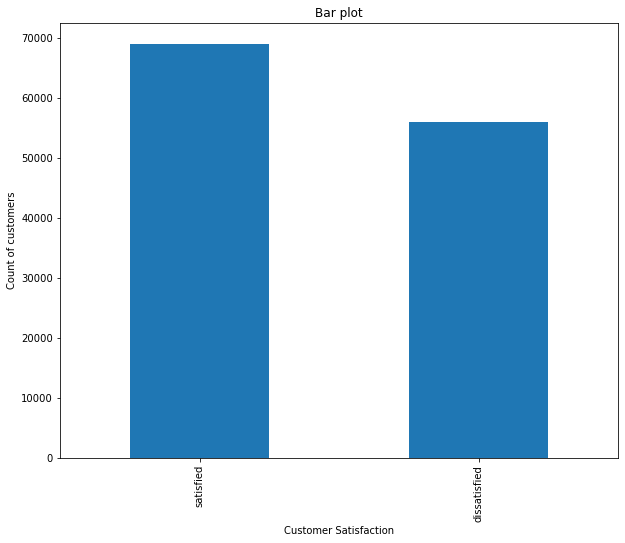

In [85]:
plt.figure(figsize=(10,8))
df_1['satisfaction'].value_counts().plot(kind="bar")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Count of customers")
plt.title("Bar plot")
plt.show()

Inference: satisfied customers(1) are more than dissatisfied cutomers(0)

# Feature Engineering

In [86]:
df_1=pd.get_dummies(df_1,drop_first=True)
df_1.head()

,Age,Flight_Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,...,Checkin service,Cleanliness,Online boarding,DepartureDelayinMinutes,satisfaction_satisfied,Gender_Male,Customer Type_NonFrequent,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,4,2,3,3,...,5,3,2,0,1,0,0,1,1,0
1,47,2464,0,0,0,0,2,2,3,4,...,2,3,2,310,1,1,0,1,0,0
2,15,2138,0,0,0,2,0,2,2,3,...,4,4,2,0,1,0,0,1,1,0
3,60,623,0,0,0,3,4,3,1,1,...,4,1,3,0,1,0,0,1,1,0
4,70,354,0,0,0,4,3,4,2,2,...,4,2,5,0,1,0,0,1,1,0


In [87]:
df_1.rename({"satisfaction_satisfied":"satisfaction"},axis=1,inplace=True)

In [88]:
df_1=df_1.reset_index(drop=True)
df_1.head()

,Age,Flight_Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,...,Checkin service,Cleanliness,Online boarding,DepartureDelayinMinutes,satisfaction,Gender_Male,Customer Type_NonFrequent,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,4,2,3,3,...,5,3,2,0,1,0,0,1,1,0
1,47,2464,0,0,0,0,2,2,3,4,...,2,3,2,310,1,1,0,1,0,0
2,15,2138,0,0,0,2,0,2,2,3,...,4,4,2,0,1,0,0,1,1,0
3,60,623,0,0,0,3,4,3,1,1,...,4,1,3,0,1,0,0,1,1,0
4,70,354,0,0,0,4,3,4,2,2,...,4,2,5,0,1,0,0,1,1,0


# 1) Logit Model 

In [89]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
X=df_1.drop(["satisfaction"],axis=1)
y=df_1["satisfaction"]
Xc=sm.add_constant(X)


In [91]:
multicollmodel=sm.Logit(y,Xc).fit()
multicollmodel.summary()

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: inf
         Iterations 7


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           satisfaction   No. Observations:               125086
Model:                          Logit   Df Residuals:                   125064
Method:                           MLE   Df Model:                           21
Date:                Thu, 01 Jul 2021   Pseudo R-squ.:                     inf
Time:                        15:59:14   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -4.6311      0.062    -74.165      0.000      -4.754      -4.509
Age                                  -0.0096      0.001    -15.377      0.000      -0.011      -0.008
Flight_Distance                      -0.0001   8.72e-06    -13.719      0.000      -0.000      -0.000
Seat comfort                          0.2881      0.009     30.609      0.000       0.270       0.307
Departure/Arrival time convenient    -0.1580      0.007    -24.179      0.000      -0.171      -0.145
Food and drink                       -0.1749      0.009    -19.135      0.000      -0.193      -0.157
Inflight wifi service                -0.0701      0.009     -7.823      0.000      -0.088      -0.053
Inflight entertainment                0.6638      0.008     80.314      0.000       0.648       0.680
Online support                        0.0967      0.009     10.534      0.000       0.079       0.115
Ease of Online booking                0.2157      0.012     18.273      0.000       0.193       0.239
On-board service                      0.3070      0.008     36.308      0.000       0.290       0.324
Leg room service                      0.2222      0.007     30.916      0.000       0.208       0.236
Baggage handling                      0.1106      0.009     11.655      0.000       0.092       0.129
Checkin service                       0.2998      0.007     42.372      0.000       0.286       0.314
Cleanliness                           0.0839      0.010      8.495      0.000       0.065       0.103
Online boarding                       0.1834      0.010     18.245      0.000       0.164       0.203
DepartureDelayinMinutes              -0.0048      0.000    -21.134      0.000      -0.005      -0.004
Gender_Male                          -0.9177      0.017    -54.683      0.000      -0.951      -0.885
Customer Type_NonFrequent            -2.0102      0.025    -78.995      0.000      -2.060      -1.960
Type of Travel_Personal Travel       -0.8239      0.024    -34.528      0.000      -0.871      -0.777
Class_Eco                            -0.7250      0.022    -33.710      0.000      -0.767      -0.683
Class_Eco Plus                       -0.7981      0.033    -23.923      0.000      -0.863      -0.733
=====================================================================================================
"""

In [92]:
df_a=df.copy()
df_a.head(1)

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Frequent,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0


In [93]:
prob=multicollmodel.predict(Xc)
prob

0         0.472418
1         0.066179
2         0.103078
3         0.163895
4         0.223268
            ...   
125081    0.237957
125082    0.001133
125083    0.008864
125084    0.001978
125085    0.082617
Length: 125086, dtype: float64

In [94]:
df_a['Probability']=prob
df_a.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Probability
0,satisfied,Female,Frequent,65,Personal Travel,Eco,265,0,0,0,...,3,3,0,3,5,3,2,0,0.0,0.472418
1,satisfied,Male,Frequent,47,Personal Travel,Business,2464,0,0,0,...,3,4,4,4,2,3,2,310,305.0,0.066179
2,satisfied,Female,Frequent,15,Personal Travel,Eco,2138,0,0,0,...,2,3,3,4,4,4,2,0,0.0,0.103078
3,satisfied,Female,Frequent,60,Personal Travel,Eco,623,0,0,0,...,1,1,0,1,4,1,3,0,0.0,0.163895
4,satisfied,Female,Frequent,70,Personal Travel,Eco,354,0,0,0,...,2,2,0,2,4,2,5,0,0.0,0.223268


In [95]:
df_a['Residuals'] = multicollmodel.resid_pearson
df_a.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Probability,Residuals
0,satisfied,Female,Frequent,65,Personal Travel,Eco,265,0,0,0,...,3,0,3,5,3,2,0,0.0,0.472418,1.056774
1,satisfied,Male,Frequent,47,Personal Travel,Business,2464,0,0,0,...,4,4,4,2,3,2,310,305.0,0.066179,3.756392
2,satisfied,Female,Frequent,15,Personal Travel,Eco,2138,0,0,0,...,3,3,4,4,4,2,0,0.0,0.103078,2.949809
3,satisfied,Female,Frequent,60,Personal Travel,Eco,623,0,0,0,...,1,0,1,4,1,3,0,0.0,0.163895,2.258640
4,satisfied,Female,Frequent,70,Personal Travel,Eco,354,0,0,0,...,2,0,2,4,2,5,0,0.0,0.223268,1.865187


- SLR, Multiple Linear Regression, Logistic Regression
- Decision Tree, Random Forest, SVM, Bagged and boosted models
– PCA (multi-collinearity), K-Means (presence of outliers, scaling, conversion to numerical etc.)


### Assumptions for Logistic Regression:

###### 1) checking if target variable is binary

In [96]:
df['satisfaction'].unique()

array(['satisfied', 'dissatisfied'], dtype=object)

Inference: our target variable "satisfaction" is binary in nature with 1-"Satisfied" and 0-"Dissatisfied"

###### 2) linearity in the logit for continuous variables

In [97]:
df_a['logit'] = np.log(df_a['Probability']/(1-df_a['Probability'])) # odds formula

In [98]:
df_a.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Probability,Residuals,logit
0,satisfied,Female,Frequent,65,Personal Travel,Eco,265,0,0,0,...,0,3,5,3,2,0,0.0,0.472418,1.056774,-0.110441
1,satisfied,Male,Frequent,47,Personal Travel,Business,2464,0,0,0,...,4,4,2,3,2,310,305.0,0.066179,3.756392,-2.646918
2,satisfied,Female,Frequent,15,Personal Travel,Eco,2138,0,0,0,...,3,4,4,4,2,0,0.0,0.103078,2.949809,-2.163481
3,satisfied,Female,Frequent,60,Personal Travel,Eco,623,0,0,0,...,0,1,4,1,3,0,0.0,0.163895,2.258640,-1.629525
4,satisfied,Female,Frequent,70,Personal Travel,Eco,354,0,0,0,...,0,2,4,2,5,0,0.0,0.223268,1.865187,-1.246723


plt.figure(figsize=(15,8))
#plt.subplot(2,2,1)
sns.regplot(x=df_a['logit'], y=df_a['Age'], lowess=True, line_kws={'color':'red'})
plt.show()

Inference:
1) The diagram shows the relationship between logit and age. It is approximatley linear.
2) The diagram shows the relationship between logit and Flight_Distance. It is approximatley linear.
3) The diagram shows the relationship between logit and DepartureDelayinMinutes. It is approximatley linear.

###### 3. There is no high intercorrelations (i.e. multicollinearity) among the predictors

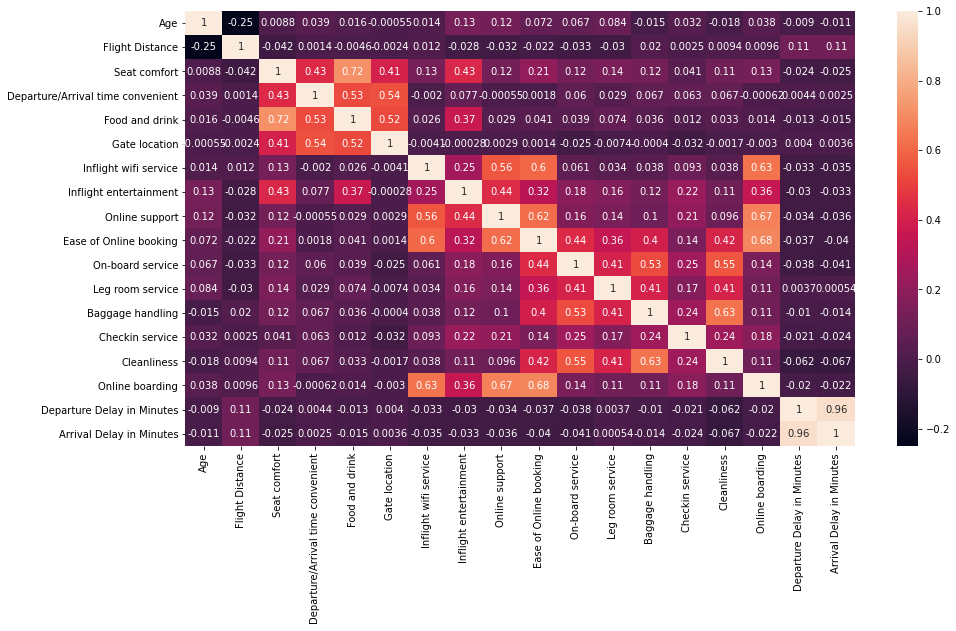

In [99]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,annot_kws={'size':10})
plt.show()

In [100]:
vif=pd.DataFrame()

In [101]:
vif["VIF"]=[variance_inflation_factor(Xc.values,i) for i in range (len(Xc.columns))]
vif["Features"]=Xc.columns

In [102]:
vif

,VIF,Features
0,58.974785,const
1,1.239188,Age
2,1.165200,Flight_Distance
3,2.448280,Seat comfort
4,1.638089,Departure/Arrival time convenient
5,2.547774,Food and drink
6,2.007454,Inflight wifi service
7,1.846189,Inflight entertainment
8,2.342591,Online support
9,3.850699,Ease of Online booking


Inferences: 
1) From heatmap, we could see that there is no strong correlation among independent variables.
2) VIF for all the independent variables is in the range of 9 and thus we could conclude that there is no multicollinearity in the dataset.

###### 4. lack of strong influential outliers

In [103]:
df_a['abs_resid'] = np.abs(df_a['Residuals'])

In [104]:
df2 = df_a.sort_values('abs_resid', ascending=False).reset_index(drop=True)
df3=df2.iloc[:,[0,1,15,-3,-1]]
df3.head()

,satisfaction,Gender,On-board service,Residuals,abs_resid
0,dissatisfied,Male,5,31.947062,31.947062
1,satisfied,Male,3,26.110318,26.110318
2,satisfied,Male,1,25.911555,25.911555
3,satisfied,Male,3,24.536836,24.536836
4,satisfied,Female,1,23.784090,23.784090


In [105]:
df3.index

RangeIndex(start=0, stop=129880, step=1)

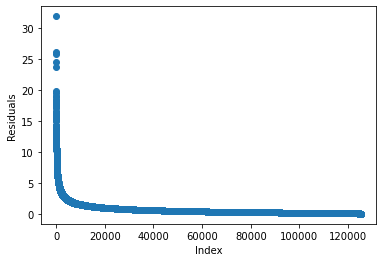

In [106]:
plt.scatter(x=df3.index, y=df3['abs_resid'])
plt.xlabel("Index")
plt.ylabel("Residuals")
plt.show()

Inference: 
As "Age","Departure delay in Minutes","Flight Distance" are continuous in nature we cannot expect them to fall in a particular range so we conclude there are no potential outliers.

# 2) Decision Tree Classifier Model

In the beginning, the whole training set is considered as the root. Feature values are preferred to be categorical. If the values are continuous then they are discretized prior to building the model. Records are distributed recursively on the basis of attribute values.

Decision trees do not make any assumptions about the distribution of the data. They are non-parametric methods where the number of parameters depends solely on the data set on which training is carried out. 3. To control the size of the tree, we need to control the number of regions


In [107]:
X=df_1.drop(["satisfaction"],axis=1)
y=df_1["satisfaction"]

In [108]:
df_1.shape

(125086, 22)

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [110]:
dtc=DecisionTreeClassifier(random_state=4)

In [111]:
model_dtc=dtc.fit(X_train,y_train)

In [112]:
y_train_pred=model_dtc.predict(X_train)
y_train_prob=model_dtc.predict_proba(X_train)[:,1]

In [113]:
y_test_pred=model_dtc.predict(X_test)
y_test_prob=model_dtc.predict_proba(X_test)[:,1]

###### train data:

In [114]:
print("Accuracy score on train data:",accuracy_score(y_train,y_train_pred))

Accuracy score on train data: 1.0


In [115]:
print("ROC_AUC score on train data:",roc_auc_score(y_train,y_train_prob))

ROC_AUC score on train data: 1.0


###### test data:

In [116]:
print("Accuracy score on test data:",accuracy_score(y_test,y_test_pred))

Accuracy score on test data: 0.9353514896338538


In [117]:
print("ROC_AUC score on test data:",roc_auc_score(y_test,y_test_prob))

ROC_AUC score on test data: 0.9343641366605522


###### confusion matrix:

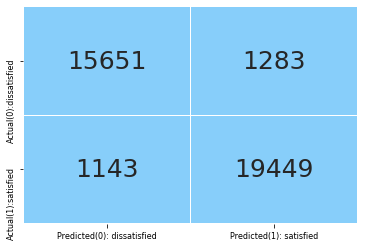

In [118]:
cm=confusion_matrix(y_test,y_test_pred)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted(0): dissatisfied','Predicted(1): satisfied'], 
                           index = ['Actual(0):dissatisfied','Actual(1):satisfied'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

# set the font size of x-axis ticks using 'fontsize'
plt.xticks(fontsize = 8)

# set the font size of y-axis ticks using 'fontsize'
plt.yticks(fontsize = 8)

# display the plot
plt.show()

###### classification report:

In [119]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     16934
           1       0.94      0.94      0.94     20592

    accuracy                           0.94     37526
   macro avg       0.94      0.93      0.93     37526
weighted avg       0.94      0.94      0.94     37526



###### youdens_table and total_cost method :

In [120]:
y_test_prob_0=model_dtc.predict_proba(X_test)[:,0]
y_test_prob_0

array([0., 1., 0., ..., 0., 1., 1.])

In [121]:
y_test_prob_1=model_dtc.predict_proba(X_test)[:,1]
y_test_prob_1

array([1., 0., 1., ..., 1., 0., 0.])

In [122]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

# create a dataframe to store the values for false positive rate, true positive rate and threshold
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
# 'ascending = False' sorts the data in descending order
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.944493,0.075765,1.0,0.868728
1,0.000000,0.000000,2.0,0.000000
2,1.000000,1.000000,0.0,0.000000


In [123]:
y_test_prob=pd.Series(y_test_prob)

In [124]:
# define a function to calculate the total_cost for a cut-off value
# pass the actual values of y, predicted probabilities of y, cost for FN and FP
def calculate_total_cost(actual_value, predicted_value, cost_FN, cost_FP):

    # pass the actual and predicted values to calculate the confusion matrix
    cm = confusion_matrix(actual_value, predicted_value)           
    
    # create an array of the confusion matrix
    cm_array = np.array(cm)
    
    # return the total_cost
    return cm_array[1,0] * cost_FN + cm_array[0,1] * cost_FP

# create an empty dataframe to store the cost for different probability cut-offs
df_total_cost = pd.DataFrame(columns = ['cut-off', 'total_cost'])

# initialize i to '0' corresponding to the 1st row in the dataframe
i = 0

# use for loop to calculate 'total_cost' for each cut-off probability value
# call the function 'calculate_total_cost' to calculate the cost
# pass the actual y-values
# calculate the predicted y-values from 'y_pred_prob' for the cut-off probability value
# assign the costs 2 and 0.4 to False Negatives and False Positives respectively
# add the obtained 'cut_off' and 'total_cost' at the ith index of the dataframe
for cut_off in range(10, 50):
    total_cost = calculate_total_cost(y_test, y_test_prob.map(lambda x: 1 if x > (cut_off/100) else 0), 3, 1.3) 
    df_total_cost.loc[i] = [(cut_off/100), total_cost] 
    
    # increment the value of 'i' for each row index in the dataframe 'df_total_cost'
    i += 1
    
# sort the dataframe based on the 'total_cost' in the ascending order
# print the first five rows in the dataframe
df_total_cost.sort_values('total_cost', ascending = True).head()

,cut-off,total_cost
0,0.10,5096.9
22,0.32,5096.9
23,0.33,5096.9
24,0.34,5096.9
25,0.35,5096.9


Inference: 
1) Tuning for threshold thorugh Youden's Index and total cost method results in many negative(0) values to be misclassified as positive(1)
2) Hence we are setting the threshold to 0.5

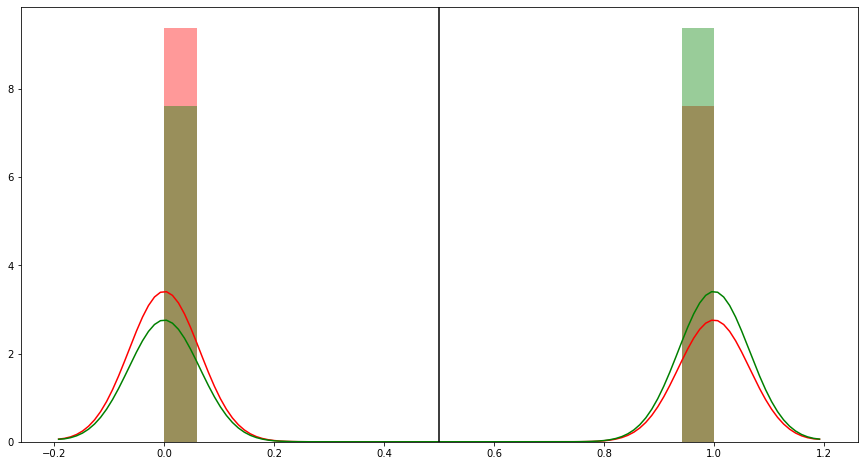

In [125]:
plt.figure(figsize=(15,8))
sns.distplot(y_test_prob_0,color='red')
sns.distplot(y_test_prob_1,color='green')
plt.axvline(0.5,color='black')
plt.show()

###### Hyper Parameter Tuning

In [126]:
dtc=DecisionTreeClassifier(random_state=10)

In [127]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform

In [128]:
tun_params=[{'max_depth':sp_randint(2,75),
             'criterion':['gini','entropy'],
             'min_samples_leaf':sp_randint(2,30)}] 

In [129]:
rs=RandomizedSearchCV(estimator=dtc,param_distributions=tun_params,n_iter=100,scoring='roc_auc',cv=3,n_jobs=-1,random_state=4)

In [130]:
model_rs=rs.fit(X,y)

In [131]:
model_rs.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10}

###### Building model with tuned hyper params:

In [132]:
dtc=DecisionTreeClassifier(**model_rs.best_params_,random_state=42)

In [133]:
model_dtc=dtc.fit(X_train,y_train)

In [134]:
y_train_pred=model_dtc.predict(X_train)
y_train_prob=model_dtc.predict_proba(X_train)[:,1]

In [135]:
y_test_pred=model_dtc.predict(X_test)
y_test_prob=model_dtc.predict_proba(X_test)[:,1]

###### train data:

In [136]:
print("Accuracy score on train data:",accuracy_score(y_train,y_train_pred))

Accuracy score on train data: 0.8473047053449063


In [137]:
print("ROC_AUC score on train data:",roc_auc_score(y_train,y_train_prob))

ROC_AUC score on train data: 0.9135643685678078


###### test data:

In [138]:
print("Accuracy score on test data:",accuracy_score(y_test,y_test_pred))

Accuracy score on test data: 0.8442679742045515


In [139]:
print("ROC_AUC score on test data:",roc_auc_score(y_test,y_test_prob))


ROC_AUC score on test data: 0.9124079040833057


In [140]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81     16934
           1       0.81      0.93      0.87     20592

    accuracy                           0.84     37526
   macro avg       0.86      0.83      0.84     37526
weighted avg       0.85      0.84      0.84     37526



###### Decision Tree Plot :

In [141]:
from sklearn.tree import plot_tree

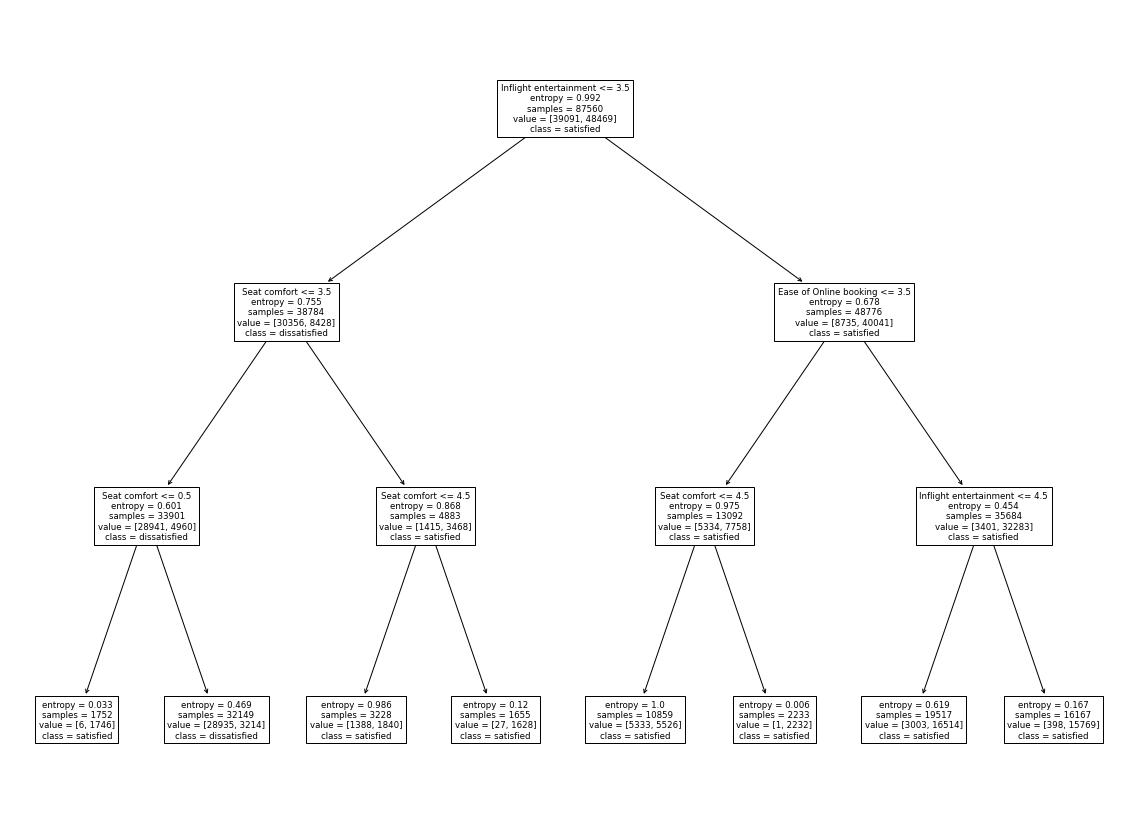

In [142]:
plt.figure(figsize=(20,15))
plot_tree(dtc,feature_names=X_train.columns,class_names=['dissatisfied','satisfied'])
plt.savefig('DecisionTreeModel')
plt.show()

###### ---- Iterim report Checkpoint ---

# 3) Random Forest Classifier Model

In [143]:
X=df_1.drop(['satisfaction'],axis=1)
y=df_1['satisfaction']

In [144]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=42)

In [145]:
rfc=RandomForestClassifier(random_state=4)
rfc.fit(X_train1,y_train1)

RandomForestClassifier(random_state=4)

In [146]:
y_train_pred1=rfc.predict(X_train1)
y_train_prob1=rfc.predict_proba(X_train1)[:,1]



y_test_pred1=rfc.predict(X_test1)
y_test_prob1=rfc.predict_proba(X_test1)[:,1]

###### train data:

In [147]:
print("Accuracy score on train data:",accuracy_score(y_train1,y_train_pred1))

Accuracy score on train data: 1.0


In [148]:
print("ROC_AUC score on train data:",roc_auc_score(y_train1,y_train_prob1))

ROC_AUC score on train data: 1.0


###### test data:

In [149]:
print("Accuracy score on test data:",accuracy_score(y_test1,y_test_pred1))

Accuracy score on test data: 0.9560038373394446


In [150]:
print("ROC_AUC score on test data:",roc_auc_score(y_test1,y_test_prob1))


ROC_AUC score on test data: 0.9922536684081507


In [151]:
print(classification_report(y_test1,y_test_pred1))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     16934
           1       0.96      0.95      0.96     20592

    accuracy                           0.96     37526
   macro avg       0.96      0.96      0.96     37526
weighted avg       0.96      0.96      0.96     37526



### Hyper Parameter Tuning

In [152]:
rfc=RandomForestClassifier(random_state=10)

In [153]:
tun_params=[{'n_estimators':sp_randint(25,75),
            'max_features':sp_randint(1,18),
            'max_depth':sp_randint(1,20),
            'min_samples_leaf':sp_randint(1,80)}]

In [154]:
rs=RandomizedSearchCV(estimator=rfc,param_distributions=tun_params,cv=3,scoring='roc_auc',n_iter=25,n_jobs=-1,random_state=10)

In [155]:
model_rs1=rs.fit(X,y)

In [156]:
model_rs1.best_params_

{'max_depth': 3, 'max_features': 9, 'min_samples_leaf': 16, 'n_estimators': 38}

### Building model with tuned hyper params

In [157]:
rfc=RandomForestClassifier(**model_rs1.best_params_,random_state=10)
rfc.fit(X_train1,y_train1)

RandomForestClassifier(max_depth=3, max_features=9, min_samples_leaf=16,
                       n_estimators=38, random_state=10)

In [158]:
y_train_pred1=rfc.predict(X_train1)
y_train_prob1=rfc.predict_proba(X_train1)[:,1]



y_test_pred1=rfc.predict(X_test1)
y_test_prob1=rfc.predict_proba(X_test1)[:,1]

###### train data:

In [159]:
print("Accuracy score on train data:",accuracy_score(y_train1,y_train_pred1))

Accuracy score on train data: 0.8625742348104157


In [160]:
print("ROC_AUC score on train data:",roc_auc_score(y_train1,y_train_prob1))

ROC_AUC score on train data: 0.9333472910803285


###### test data:

In [161]:
print("Accuracy score on test data:",accuracy_score(y_test1,y_test_pred1))

Accuracy score on test data: 0.8578319032137718


In [162]:
print("ROC_AUC score on test data:",roc_auc_score(y_test1,y_test_prob1))


ROC_AUC score on test data: 0.9322885666244441


In [163]:
print(classification_report(y_test1,y_test_pred1))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84     16934
           1       0.86      0.89      0.87     20592

    accuracy                           0.86     37526
   macro avg       0.86      0.85      0.86     37526
weighted avg       0.86      0.86      0.86     37526



### Feature importance 

In [164]:
pd.DataFrame(rfc.feature_importances_,index=X.columns,columns=['importance']).sort_values(['importance'],ascending=False)

,importance
Inflight entertainment,0.506072
Seat comfort,0.136031
Ease of Online booking,0.129120
Online support,0.090638
On-board service,0.036899
Customer Type_NonFrequent,0.032052
Food and drink,0.018499
Online boarding,0.013215
Cleanliness,0.008423
Leg room service,0.006877


### OOB Score

In [165]:
rfc=RandomForestClassifier(**model_rs1.best_params_,random_state=4,oob_score=True)
rfc.fit(X_train1,y_train1)

RandomForestClassifier(max_depth=3, max_features=9, min_samples_leaf=16,
                       n_estimators=38, oob_score=True, random_state=4)

In [166]:
rfc.oob_score_

0.8622544540886249

In [167]:
# oob_score uses observations that has not been included for training and is used for testing
# bootstrap sampling will not include all observations by design 

In [168]:
from sklearn import tree

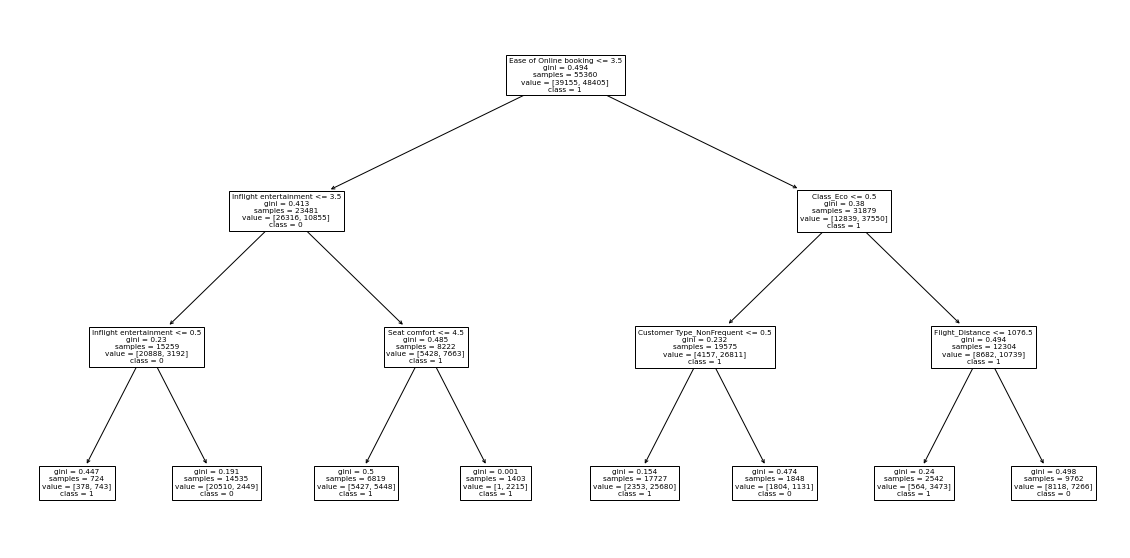

In [169]:
plt.figure(figsize=(20,10))
tree.plot_tree(rfc.estimators_[0],feature_names=X_train1.columns,class_names=['0','1'])
plt.show()

# 4) Ada Boost Classifier Model

In [170]:
X=df_1.drop(['satisfaction'],axis=1)
y=df_1['satisfaction']

In [171]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
adac = AdaBoostClassifier(random_state=4)

adac.fit(X_train2, y_train2)

AdaBoostClassifier(random_state=4)

In [173]:
y_train_pred2=adac.predict(X_train2)
y_train_prob2=adac.predict_proba(X_train2)[:,1]



y_test_pred2=adac.predict(X_test2)
y_test_prob2=adac.predict_proba(X_test2)[:,1]

###### train data:

In [174]:
print("Accuracy score on train data:",accuracy_score(y_train2,y_train_pred2))

Accuracy score on train data: 0.9002284148012791


In [175]:
print("ROC_AUC score on train data:",roc_auc_score(y_train2,y_train_prob2))

ROC_AUC score on train data: 0.9640823266510653


###### test data:

In [176]:
print("Accuracy score on test data:",accuracy_score(y_test2,y_test_pred2))

Accuracy score on test data: 0.8971646325214518


In [177]:
print("ROC_AUC score on test data:",roc_auc_score(y_test2,y_test_prob2))


ROC_AUC score on test data: 0.9631316022009302


In [178]:
print(classification_report(y_test2,y_test_pred2))

              precision    recall  f1-score   support

           0       0.88      0.89      0.89     16934
           1       0.91      0.90      0.91     20592

    accuracy                           0.90     37526
   macro avg       0.90      0.90      0.90     37526
weighted avg       0.90      0.90      0.90     37526



### Hyper Parameter Tuning

In [179]:
adac = AdaBoostClassifier(random_state=4)

In [180]:
params = {'n_estimators': sp_randint(25, 70),
          'learning_rate': sp_uniform(0, 0.1)}

In [181]:
rs=RandomizedSearchCV(estimator=adac,param_distributions=params,cv=3,scoring='roc_auc',n_iter=25,n_jobs=-1,random_state=10)

In [182]:
model_rs2=rs.fit(X,y)

In [183]:
model_rs2.best_params_

{'learning_rate': 0.030070005663620336, 'n_estimators': 32}

### Building model with tuned hyper params

In [184]:
adac = AdaBoostClassifier(**model_rs2.best_params_,random_state=4)

adac.fit(X_train2, y_train2)

AdaBoostClassifier(learning_rate=0.030070005663620336, n_estimators=32,
                   random_state=4)

In [185]:
y_train_pred2=adac.predict(X_train2)
y_train_prob2=adac.predict_proba(X_train2)[:,1]



y_test_pred2=adac.predict(X_test2)
y_test_prob2=adac.predict_proba(X_test2)[:,1]

###### train data:

In [186]:
print("Accuracy score on train data:",accuracy_score(y_train2,y_train_pred2))

Accuracy score on train data: 0.8039858382823207


In [187]:
print("ROC_AUC score on train data:",roc_auc_score(y_train2,y_train_prob2))

ROC_AUC score on train data: 0.8862977016974503


###### test data:

In [188]:
print("Accuracy score on test data:",accuracy_score(y_test2,y_test_pred2))

Accuracy score on test data: 0.8000852742098812


In [189]:
print("ROC_AUC score on test data:",roc_auc_score(y_test2,y_test_prob2))


ROC_AUC score on test data: 0.8834142071545374


In [190]:
print(classification_report(y_test2,y_test_pred2))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78     16934
           1       0.82      0.82      0.82     20592

    accuracy                           0.80     37526
   macro avg       0.80      0.80      0.80     37526
weighted avg       0.80      0.80      0.80     37526



### Feature Importance

In [191]:
pd.DataFrame(adac.feature_importances_, index=X_train2.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
Inflight entertainment,0.75000
Ease of Online booking,0.21875
Seat comfort,0.03125
Age,0.00000
Checkin service,0.00000
Class_Eco,0.00000
Type of Travel_Personal Travel,0.00000
Customer Type_NonFrequent,0.00000
Gender_Male,0.00000
DepartureDelayinMinutes,0.00000


# 5)Gradient  Boosting Classifier Model

In [192]:
X=df_1.drop(['satisfaction'],axis=1)
y=df_1['satisfaction']

In [193]:
X_train3,X_test3,y_train3,y_test3=train_test_split(X,y,test_size=0.3,random_state=42)

In [194]:
gbc=GradientBoostingClassifier(random_state=4)
gbc.fit(X_train3,y_train3)

GradientBoostingClassifier(random_state=4)

In [195]:
y_train_pred3=gbc.predict(X_train3)
y_train_prob3=gbc.predict_proba(X_train3)[:,1]



y_test_pred3=gbc.predict(X_test3)
y_test_prob3=gbc.predict_proba(X_test3)[:,1]

###### train data:

In [196]:
print("Accuracy score on train data:",accuracy_score(y_train3,y_train_pred3))

Accuracy score on train data: 0.9258908177249886


In [197]:
print("ROC_AUC score on train data:",roc_auc_score(y_train3,y_train_prob3))

ROC_AUC score on train data: 0.9807032263151334


###### test data:

In [198]:
print("Accuracy score on test data:",accuracy_score(y_test3,y_test_pred3))

Accuracy score on test data: 0.9211213558599372


In [199]:
print("ROC_AUC score on test data:",roc_auc_score(y_test3,y_test_prob3))


ROC_AUC score on test data: 0.9793166631129457


In [200]:
print(classification_report(y_test3,y_test_pred3))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     16934
           1       0.93      0.93      0.93     20592

    accuracy                           0.92     37526
   macro avg       0.92      0.92      0.92     37526
weighted avg       0.92      0.92      0.92     37526



### Hyper Parameter Tuning

In [201]:
gbc = GradientBoostingClassifier(random_state=4)

In [202]:
params = {'n_estimators': sp_randint(25, 70),
          'learning_rate': sp_uniform(0, 0.1),
         'max_depth':sp_randint(2,25)}

In [203]:
rs=RandomizedSearchCV(estimator=gbc,param_distributions=params,cv=3,scoring='roc_auc',n_iter=25,n_jobs=-1,random_state=10)

In [204]:
model_rs3=rs.fit(X,y)

In [205]:
model_rs3.best_params_

{'learning_rate': 0.06262871483113926, 'max_depth': 3, 'n_estimators': 45}

### Building model with tuned hyper params

In [206]:
gbc = GradientBoostingClassifier(**model_rs3.best_params_,random_state=4)

gbc.fit(X_train3, y_train3)

GradientBoostingClassifier(learning_rate=0.06262871483113926, n_estimators=45,
                           random_state=4)

In [207]:
y_train_pred2=gbc.predict(X_train3)
y_train_prob2=gbc.predict_proba(X_train3)[:,1]



y_test_pred3=gbc.predict(X_test3)
y_test_prob3=gbc.predict_proba(X_test3)[:,1]

###### train data:

In [208]:

print("Accuracy score on train data:",accuracy_score(y_train3,y_train_pred3))

Accuracy score on train data: 0.9258908177249886


In [209]:
print("ROC_AUC score on train data:",roc_auc_score(y_train3,y_train_prob3))

ROC_AUC score on train data: 0.9807032263151334


###### test data:

In [210]:
print("Accuracy score on test data:",accuracy_score(y_test3,y_test_pred3))

Accuracy score on test data: 0.8902627511591963


In [211]:
print("ROC_AUC score on test data:",roc_auc_score(y_test3,y_test_prob3))


ROC_AUC score on test data: 0.96339816998514


In [212]:
print(classification_report(y_test3,y_test_pred3))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88     16934
           1       0.90      0.90      0.90     20592

    accuracy                           0.89     37526
   macro avg       0.89      0.89      0.89     37526
weighted avg       0.89      0.89      0.89     37526



### Feature Importance

In [213]:
pd.DataFrame(gbc.feature_importances_, index=X_train3.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
Inflight entertainment,0.544059
Seat comfort,0.225030
Ease of Online booking,0.064357
Customer Type_NonFrequent,0.028054
On-board service,0.023946
Leg room service,0.022162
Type of Travel_Personal Travel,0.020474
Online support,0.014973
Checkin service,0.014775
Class_Eco,0.012107


# 6) Light Gradient Boosting Classifier Model

In [214]:
X=df_1.drop(['satisfaction'],axis=1)
y=df_1['satisfaction']

In [215]:
X_train4,X_test4,y_train4,y_test4=train_test_split(X,y,test_size=0.3,random_state=42)

In [216]:
lgbmc=lgb.LGBMClassifier(random_state=4)
lgbmc.fit(X_train4,y_train4)

LGBMClassifier(random_state=4)

In [217]:
y_train_pred4=lgbmc.predict(X_train4)
y_train_prob4=lgbmc.predict_proba(X_train4)[:,1]



y_test_pred4=lgbmc.predict(X_test4)
y_test_prob4=lgbmc.predict_proba(X_test4)[:,1]

#### Train data

In [218]:
print("Accuracy score on train data:",accuracy_score(y_train4,y_train_pred4))

Accuracy score on train data: 0.9577204202832343


In [219]:
print("ROC_AUC score on train data:",roc_auc_score(y_train4,y_train_prob4))

ROC_AUC score on train data: 0.9939845421966294


#### Test data

In [220]:
print("Accuracy score on test data:",accuracy_score(y_test4,y_test_pred4))

Accuracy score on test data: 0.9527794062783137


In [221]:
print("ROC_AUC score on test data:",roc_auc_score(y_test4,y_test_prob4))

ROC_AUC score on test data: 0.9925198203680102


In [222]:
print(classification_report(y_test4,y_test_pred4))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     16934
           1       0.96      0.95      0.96     20592

    accuracy                           0.95     37526
   macro avg       0.95      0.95      0.95     37526
weighted avg       0.95      0.95      0.95     37526



### Hyperparameter Tuning

In [223]:
lgbmc=lgb.LGBMClassifier(random_state=4)
params={'n_estimators':sp_randint(25,70),
       'max_depth':sp_randint(2,25),
       'learning_rate':sp_uniform(0,0.1),
       'num_leaves':sp_randint(2,30)}

In [224]:
rs=RandomizedSearchCV(estimator=lgbmc,param_distributions=params,cv=3,scoring='roc_auc',n_iter=25,n_jobs=-1,random_state=10)

In [225]:
model_rs4=rs.fit(X,y)

In [226]:
model_rs4.best_params_

{'learning_rate': 0.019812181303297028,
 'max_depth': 3,
 'n_estimators': 33,
 'num_leaves': 6}

### Building model with hyperparameters tuned : LGBM 'Split' importance

In [227]:
lgbmc = lgb.LGBMClassifier(**model_rs4.best_params_,random_state=4,importance_type='split')

lgbmc.fit(X_train4, y_train4)

LGBMClassifier(learning_rate=0.019812181303297028, max_depth=3, n_estimators=33,
               num_leaves=6, random_state=4)

In [228]:
y_train_pred4=lgbmc.predict(X_train4)
y_train_prob4=lgbmc.predict_proba(X_train4)[:,1]

y_test_pred4=lgbmc.predict(X_test4)
y_test_prob4=lgbmc.predict_proba(X_test4)[:,1]

## Train data

In [229]:
print("Accuracy score on train data:",accuracy_score(y_train4,y_train_pred4))

Accuracy score on train data: 0.8473047053449063


In [230]:
print("ROC_AUC score on train data:",roc_auc_score(y_train4,y_train_prob4))

ROC_AUC score on train data: 0.9219437037824043


## Test data

In [231]:
print("Accuracy score on test data:",accuracy_score(y_test4,y_test_pred4))

Accuracy score on test data: 0.8442679742045515


In [232]:
print("ROC_AUC score on test data:",roc_auc_score(y_test4,y_test_prob4))

ROC_AUC score on test data: 0.9206890646523929


In [233]:
print(classification_report(y_test4,y_test_pred4))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81     16934
           1       0.81      0.93      0.87     20592

    accuracy                           0.84     37526
   macro avg       0.86      0.83      0.84     37526
weighted avg       0.85      0.84      0.84     37526



In [234]:
pd.DataFrame(lgbmc.feature_importances_, index=X_train4.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
Seat comfort,84
Inflight entertainment,48
Ease of Online booking,22
Online support,6
On-board service,3
Leg room service,1
Checkin service,1
Online boarding,0
Class_Eco,0
Type of Travel_Personal Travel,0


## Building model with hyperparameters tuned : LGBM 'Gain' importance

In [235]:
lgbmc = lgb.LGBMClassifier(**model_rs4.best_params_,random_state=4,importance_type='gain')

lgbmc.fit(X_train4, y_train4)

LGBMClassifier(importance_type='gain', learning_rate=0.019812181303297028,
               max_depth=3, n_estimators=33, num_leaves=6, random_state=4)

In [236]:
y_train_pred4=lgbmc.predict(X_train4)
y_train_prob4=lgbmc.predict_proba(X_train4)[:,1]



y_test_pred4=lgbmc.predict(X_test4)
y_test_prob4=lgbmc.predict_proba(X_test4)[:,1]

In [237]:
print("Accuracy score on train data:",accuracy_score(y_train4,y_train_pred4))

Accuracy score on train data: 0.8473047053449063


In [238]:
print("ROC_AUC score on train data:",roc_auc_score(y_train4,y_train_prob4))

ROC_AUC score on train data: 0.9219437037824043


In [239]:
print("Accuracy score on test data:",accuracy_score(y_test4,y_test_pred4))

Accuracy score on test data: 0.8442679742045515


In [240]:
print("ROC_AUC score on test data:",roc_auc_score(y_test4,y_test_prob4))

ROC_AUC score on test data: 0.9206890646523929


In [241]:
print(classification_report(y_test4,y_test_pred4))

              precision    recall  f1-score   support

           0       0.90      0.74      0.81     16934
           1       0.81      0.93      0.87     20592

    accuracy                           0.84     37526
   macro avg       0.86      0.83      0.84     37526
weighted avg       0.85      0.84      0.84     37526



In [242]:
pd.DataFrame(lgbmc.feature_importances_, index=X_train4.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
Inflight entertainment,640301.969360
Seat comfort,232009.185974
Ease of Online booking,60592.800171
Online support,12285.049927
On-board service,5725.349976
Leg room service,1793.859985
Checkin service,1751.869995
Online boarding,0.000000
Class_Eco,0.000000
Type of Travel_Personal Travel,0.000000


# Defining Measures to improve Overall Satisfaction

# ****************************END*****************************************************************************